# Aladynoulli Performance Evaluation Notebook

This notebook orchestrates all performance evaluation analyses for Aladynoulli.

## Execution Order

1. **Setup** (Run Once): Assemble PI tensors
2. **Generate Predictions** (Run Once Each): Time horizons, washout, age offsets
3. **Load Results** (Safe to Run Multiple Times): Load CSV files
4. **Comparisons** (Run Once Each): External scores, Delphi, Cox baseline, prediction drops
5. **Visualizations** (Safe to Run Multiple Times): Create plots
6. **Summary** (Read-Only): Key findings

## Main Approach: Pooled Retrospective

All comparisons use the `pooled_retrospective` approach by default, which:
- Uses phi trained externally and validated with LOO tests
- Represents clinically implementable performance
- Uses pi from: `enrollment_predictions_fixedphi_RETROSPECTIVE_pooled/pi_enroll_fixedphi_sex_FULL.pt`

## Note on Re-running

- Jupyter will skip cells that have already been executed
- Generation cells should be marked as "not evaluated" after first run
- Loading and visualization cells can be run multiple times safely


---

## SECTION 1: SETUP & DATA PREPARATION

**Note**: For `pooled_retrospective`, we use `pi_full_400k.pt` from Downloads directly.
Assembly step is NOT needed - the downloaded file is the trusted source.


In [21]:
# ============================================================================
# NOTE: ASSEMBLY NOT NEEDED FOR POOLED_RETROSPECTIVE
# ============================================================================
"""
SKIP THIS CELL - Assembly is NOT needed for pooled_retrospective approach.

For pooled_retrospective, we use pi_full_400k.pt from Downloads directly.
This is the trusted, cached version from Dropbox - do NOT reassemble.

The assembly step would create:
  - enrollment_predictions_fixedphi_RETROSPECTIVE_pooled/pi_enroll_fixedphi_sex_FULL.pt
  
But the scripts use:
  - /Users/sarahurbut/Downloads/pi_full_400k.pt (directly)

So assembly is unnecessary and should NOT be run.
"""

print("="*80)
print("ASSEMBLY STEP SKIPPED")
print("="*80)
print("\nFor pooled_retrospective, using pi_full_400k.pt from Downloads directly.")
print("This is the trusted, cached version - no assembly needed.")
print("\nProceeding to generation steps...")
print("="*80)


ASSEMBLY STEP SKIPPED

For pooled_retrospective, using pi_full_400k.pt from Downloads directly.
This is the trusted, cached version - no assembly needed.

Proceeding to generation steps...


---

## SECTION 2: GENERATE PREDICTIONS

**Run Once Each**: Generate predictions for different analyses

**Note**: These cells will use existing results if available. They won't regenerate unless needed.


In [22]:
# ============================================================================
# STEP 1: GENERATE TIME HORIZON PREDICTIONS
# ============================================================================
"""
Generates predictions for multiple time horizons: 5yr, 10yr, 30yr, static 10yr
Results saved to: results/time_horizons/{approach}/
"""

import subprocess
import sys
from pathlib import Path

script_dir = Path('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks')

print("="*80)
print("GENERATING TIME HORIZON PREDICTIONS")
print("="*80)

# Generate for pooled_retrospective (main approach)
print("\n1. Generating pooled_retrospective time horizon predictions...")
result = subprocess.run([
    sys.executable,
    str(script_dir / 'generate_time_horizon_predictions.py'),
    '--approach', 'pooled_retrospective'
], capture_output=True, text=True)
print(result.stdout)
if result.stderr:
    print("STDERR:", result.stderr)
if result.returncode != 0:
    print(f"\n⚠️  WARNING: Script exited with return code {result.returncode}")

print("\n✓ Time horizon predictions complete")


GENERATING TIME HORIZON PREDICTIONS

1. Generating pooled_retrospective time horizon predictions...
GENERATING TIME HORIZON PREDICTIONS: POOLED_RETROSPECTIVE
Pi tensor: /Users/sarahurbut/Downloads/pi_full_400k.pt
Horizons: ['5', '10', '30', 'static10']
Output directory: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/time_horizons/pooled_retrospective

Loading data...
Loaded pi tensor: torch.Size([400000, 348, 52])
Loaded Y tensor: torch.Size([407878, 348, 52])
Loaded E tensor: torch.Size([407878, 348])
Loaded pce_df: 400000 patients

Subsetting to first 400000 patients...
After subsetting: pi: 400000, Y: 400000, E: 400000, pce_df: 400000

RESULTS ALREADY EXIST - SKIPPING REGENERATION
Found existing results in: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/time_horizons/pooled_retrospective
  ✓ 5yr_results.csv
  ✓ 10yr_results.csv
  ✓ 30yr_results.csv
  ✓ static_10yr_results.csv
  ✓ comparison_all_horizons.csv

To regene

In [23]:
# ============================================================================
# STEP 2: GENERATE WASHOUT PREDICTIONS
# ============================================================================
"""
Generates 1-year predictions with different washout periods: 0yr, 1yr, 2yr
Results saved to: results/washout/{approach}/
"""

import subprocess
import sys
from pathlib import Path

script_dir = Path('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks')

print("="*80)
print("GENERATING WASHOUT PREDICTIONS")
print("="*80)

# Generate for pooled_retrospective (main approach)
print("\n1. Generating pooled_retrospective washout predictions...")
result = subprocess.run([
    sys.executable,
    str(script_dir / 'generate_washout_predictions.py'),
    '--approach', 'pooled_retrospective'
], capture_output=True, text=True)
print(result.stdout)
if result.stderr:
    print("STDERR:", result.stderr)
if result.returncode != 0:
    print(f"\n⚠️  WARNING: Script exited with return code {result.returncode}")

print("\n✓ Washout predictions complete")


GENERATING WASHOUT PREDICTIONS

1. Generating pooled_retrospective washout predictions...
GENERATING WASHOUT PREDICTIONS: POOLED_RETROSPECTIVE
Pi tensor: /Users/sarahurbut/Downloads/pi_full_400k.pt
Washout periods: 0yr, 1yr, 2yr
Output directory: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/washout/pooled_retrospective

Loading data...
Loaded pi tensor: torch.Size([400000, 348, 52])
Loaded Y tensor: torch.Size([407878, 348, 52])
Loaded E tensor: torch.Size([407878, 348])
Loaded pce_df: 400000 patients

Subsetting to first 400000 patients...
After subsetting: pi: 400000, Y: 400000, E: 400000, pce_df: 400000

RESULTS ALREADY EXIST - SKIPPING REGENERATION
Found existing results in: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/washout/pooled_retrospective
  ✓ washout_0yr_results.csv
  ✓ washout_1yr_results.csv
  ✓ washout_2yr_results.csv
  ✓ washout_comparison_all_offsets.csv

To regenerate, delete the existing result fi

In [24]:
# ============================================================================
# STEP 3: GENERATE AGE OFFSET PREDICTIONS (OPTIONAL)
# ============================================================================
"""
Generates rolling 1-year predictions using models trained at different time offsets
Evaluates models trained at enrollment + 0, 1, 2, ..., 9 years (offsets 0-9)
Uses pre-computed pi batches from AWS run (downloaded to ~/Downloads/age_offset_files/)
Currently evaluates on batch 0-10000 (first 10K patients)
Results saved to: results/age_offset/{approach}/
"""

import subprocess
import sys
from pathlib import Path

script_dir = Path('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks')

print("="*80)
print("GENERATING AGE OFFSET PREDICTIONS")
print("="*80)
print("\nThis will generate rolling 1-year predictions using models trained at")
print("enrollment + 0, 1, 2, ..., 9 years (offsets 0-9).")
print("\nUses pre-computed pi batches from AWS run.")
print("Currently evaluates on batch 0-10000 (first 10K patients).")
print("="*80)

# Generate age offset predictions for pooled retrospective (main approach)
print("\n1. Generating pooled_retrospective age offset predictions...")
result = subprocess.run([
    sys.executable,
    str(script_dir / 'generate_age_offset_predictions.py'),
    '--approach', 'pooled_retrospective',
    '--max_offset', '9',
    '--start_idx', '0',
    '--end_idx', '10000'
], capture_output=True, text=True)
print(result.stdout)
if result.stderr:
    print("STDERR:", result.stderr)
if result.returncode != 0:
    print(f"\n⚠️  WARNING: Script exited with return code {result.returncode}")
else:
    print("✓ Age offset predictions complete")

print("\n" + "="*80)
print("AGE OFFSET PREDICTIONS COMPLETE")
print("="*80)
print("\nResults saved to: results/age_offset/{approach}/")
print("  - age_offset_aucs_batch_0_10000.csv (AUCs by disease and offset)")
print("  - age_offset_aucs_pivot_batch_0_10000.csv (pivot table for easy viewing)")
print("\nROC curves are plotted for ASCVD by default (saved as PDF).")


GENERATING AGE OFFSET PREDICTIONS

This will generate rolling 1-year predictions using models trained at
enrollment + 0, 1, 2, ..., 9 years (offsets 0-9).

Uses pre-computed pi batches from AWS run.
Currently evaluates on batch 0-10000 (first 10K patients).

1. Generating pooled_retrospective age offset predictions...
GENERATING AGE OFFSET PREDICTIONS
Approach: pooled_retrospective
Batch: 0-10000
Max offset: 9
Loading full data tensors...
Subsetting to batch 0-10000...

Loading pi batches for offsets 0-9...
  Loading offset 0: pi_enroll_fixedphi_age_offset_0_sex_0_10000_try2_withpcs_newrun.pt
  Loading offset 1: pi_enroll_fixedphi_age_offset_1_sex_0_10000_try2_withpcs_newrun.pt
  Loading offset 2: pi_enroll_fixedphi_age_offset_2_sex_0_10000_try2_withpcs_newrun.pt
  Loading offset 3: pi_enroll_fixedphi_age_offset_3_sex_0_10000_try2_withpcs_newrun.pt
  Loading offset 4: pi_enroll_fixedphi_age_offset_4_sex_0_10000_try2_withpcs_newrun.pt
  Loading offset 5: pi_enroll_fixedphi_age_offset_5_

---

## SECTION 3: LOAD RESULTS

**Safe to Run Multiple Times**: Loads CSV files without regenerating


In [25]:
# ============================================================================
# LOAD GENERATED RESULTS
# ============================================================================
"""
Loads all generated CSV files into dictionaries for analysis.
Safe to run multiple times - reloads results without regenerating.
"""

import pandas as pd
from pathlib import Path

results_base = Path('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results')
approach = 'pooled_retrospective'

print("="*80)
print("LOADING GENERATED RESULTS")
print("="*80)

# Load time horizon results
time_horizon_results = {}
time_horizon_dir = results_base / 'time_horizons' / approach
if time_horizon_dir.exists():
    for horizon in ['5yr', '10yr', '30yr', 'static_10yr']:
        file_path = time_horizon_dir / f'{horizon}_results.csv'
        if file_path.exists():
            time_horizon_results[horizon] = pd.read_csv(file_path)
            print(f"✓ Loaded {horizon} results: {len(time_horizon_results[horizon])} diseases")
        else:
            print(f"⚠️  {horizon} results not found: {file_path}")

# Load washout results
washout_results = {}
washout_dir = results_base / 'washout' / approach
if washout_dir.exists():
    for offset in ['0yr', '1yr', '2yr']:
        file_path = washout_dir / f'washout_{offset}_results.csv'
        if file_path.exists():
            washout_results[offset] = pd.read_csv(file_path)
            print(f"✓ Loaded washout {offset} results: {len(washout_results[offset])} diseases")
        else:
            print(f"⚠️  Washout {offset} results not found: {file_path}")

# Load age offset results (optional)
age_offset_results = {}
age_offset_dir = results_base / 'age_offset' / approach
if age_offset_dir.exists():
    pivot_file = age_offset_dir / 'age_offset_aucs_pivot_batch_0_10000.csv'
    if pivot_file.exists():
        age_offset_results['pivot'] = pd.read_csv(pivot_file)
        print(f"✓ Loaded age offset pivot results: {len(age_offset_results['pivot'])} diseases")
    else:
        print(f"⚠️  Age offset pivot results not found: {pivot_file}")
    
    aucs_file = age_offset_dir / 'age_offset_aucs_batch_0_10000.csv'
    if aucs_file.exists():
        age_offset_results['aucs'] = pd.read_csv(aucs_file)
        print(f"✓ Loaded age offset AUCs results")
else:
    print(f"⚠️  Age offset directory not found: {age_offset_dir} (optional)")

print("\n" + "="*80)
print("RESULTS LOADED")
print("="*80)


LOADING GENERATED RESULTS
✓ Loaded 5yr results: 28 diseases
✓ Loaded 10yr results: 28 diseases
✓ Loaded 30yr results: 28 diseases
✓ Loaded static_10yr results: 28 diseases
✓ Loaded washout 0yr results: 28 diseases
✓ Loaded washout 1yr results: 28 diseases
✓ Loaded washout 2yr results: 28 diseases
✓ Loaded age offset pivot results: 28 diseases
✓ Loaded age offset AUCs results

RESULTS LOADED


---

## SECTION 4: COMPARISONS & VALIDATIONS

**Run Once Each**: Compare with external benchmarks and analyze results


In [26]:
# ============================================================================
# COMPARE WITH EXTERNAL SCORES
# ============================================================================
"""
Compares Aladynoulli with PCE, PREVENT, Gail, QRISK3
Results saved to: results/comparisons/pooled_retrospective/external_scores_comparison.csv
"""

%run compare_with_external_scores.py --approach pooled_retrospective --n_bootstraps 100


Set random seed to 42 for reproducibility
RESULTS ALREADY EXIST - SKIPPING REGENERATION
Found existing results: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/comparisons/pooled_retrospective/external_scores_comparison.csv

To regenerate, delete the existing result file first.


In [27]:
# ============================================================================
# COMPARE WITH DELPHI (1-YEAR)
# ============================================================================
"""
Compares Aladynoulli 1-year predictions with Delphi-2M 1-year predictions
Results saved to: results/comparisons/pooled_retrospective/delphi_comparison_*.csv
"""

%run compare_delphi_1yr_import.py


ALADYNOULLI vs DELPHI: 1-YEAR PREDICTION COMPARISON

Loading Aladynoulli results...
Loaded Aladynoulli results for 28 diseases

Extracting Delphi results from supplementary table...
Extracted Delphi results for 28 diseases

Creating comparison...

ALADYNOULLI vs DELPHI: DISEASES WHERE ALADYNOULLI WINS (1-YEAR, 0-YEAR GAP)

Total wins: 15 out of 28 diseases
Win rate: 53.6%

Disease                    Aladynoulli       Delphi    Advantage    Percent
----------------------------------------------------------------------------------------------------
Parkinsons                      0.8265       0.6108       0.2157      35.3%
Multiple_Sclerosis              0.8363       0.6545       0.1818      27.8%
Prostate_Cancer                 0.8434       0.6636       0.1798      27.1%
ASCVD                           0.8961       0.7370       0.1591      21.6%
Atrial_Fib                      0.8177       0.6721       0.1456      21.7%
Breast_Cancer                   0.8212       0.6985       0.1227   

In [28]:
# ============================================================================
# COMPARE MULTI-HORIZON WITH DELPHI
# ============================================================================
"""
Compares Aladynoulli multi-horizon predictions (5yr, 10yr, 30yr) with Delphi 1-year
Results saved to: results/comparisons/pooled_retrospective/delphi_comparison_multihorizon.csv
"""

%run compare_delphi_multihorizon.py


ALADYNOULLI vs DELPHI: MULTI-HORIZON COMPARISON

Loading Aladynoulli multi-horizon results...
Loaded Aladynoulli results for 28 diseases
Horizons available: 1yr (0gap), 1yr (1gap), 5yr, 10yr, 30yr, static10yr

Extracting Delphi results from supplementary table...
Extracted Delphi results for 28 diseases

Creating multi-horizon comparison...

ALADYNOULLI PERFORMANCE ACROSS HORIZONS vs DELPHI (1-YEAR, 0-GAP)

Disease                       Delphi    Ala_1yr    Ala_5yr   Ala_10yr   Ala_30yr Ala_st10yr
----------------------------------------------------------------------------------------------------
Parkinsons                    0.6108     0.8265     0.7320     0.7216     0.6222     0.7220
Secondary_Cancer              0.5691     0.6076     0.6112     0.6068     0.5664     0.6110
Prostate_Cancer               0.6636     0.8434     0.7305     0.6794     0.6741     0.6844
Osteoporosis                  0.7037     0.7728     0.7018     0.6891     0.6454     0.6763
ASCVD                       

In [29]:
# ============================================================================
# COMPARE WITH COX BASELINE
# ============================================================================
"""
Compares Aladynoulli static 10-year predictions with Cox baseline (age + sex only)
Results saved to: results/comparisons/pooled_retrospective/cox_baseline_comparison_*.csv
"""

%run compare_with_cox_baseline.py


ALADYNOULLI vs COX BASELINE (AGE + SEX ONLY, NO NOULLI)
Cox model: 10-year follow-up (trained on 20001-30000, tested on 0-10000)
Aladynoulli: Static 10-year (1-year score for 10-year outcome)

Loading Cox baseline results...
✓ Loaded Cox baseline results: 28 diseases
  Columns: ['Unnamed: 0', 'disease_group', 'auc']

First few rows:
    Unnamed: 0      Disease  Cox_AUC
0        ASCVD        ASCVD   0.6338
1     Diabetes     Diabetes   0.6003
2   Atrial_Fib   Atrial_Fib   0.5883
3          CKD          CKD   0.5292
4  All_Cancers  All_Cancers   0.5411

Loading Aladynoulli static 10-year results...
Note: Cox model uses 10-year follow-up, comparing with static 10-year (1-year score for 10-year outcome)
✓ Loaded Aladynoulli static 10-year results: 28 diseases

Merging results...
✓ Merged results: 28 diseases
  Diseases in both: 28
  Only in Cox: 0
  Only in Aladynoulli: 0

ALADYNOULLI vs COX BASELINE: STATIC 10-YEAR PREDICTIONS

Disease                      Cox_AUC Aladynoulli_AUC  Improve

In [78]:
# ============================================================================
# ANALYZE PREDICTION DROPS
# ============================================================================
"""
Analyzes why predictions drop between 0-year and 1-year washout
Focuses on hypercholesterolemia and other precursor diseases
Results saved to: results/analysis/prediction_drops_*.csv
"""

%run analyze_prediction_drops.py --disease ASCVD


Loading data...
ANALYZING PREDICTION DROPS FOR: ASCVD
'ASCVD' is a disease group. Finding individual diseases...
  Found: Myocardial infarction at index 112
  Found: Coronary atherosclerosis at index 114
  Found: Other acute and subacute forms of ischemic heart disease at index 116
  Found: Unstable angina (intermediate coronary syndrome) at index 111
  Found: Angina pectoris at index 113
  Found: Other chronic ischemic heart disease, unspecified at index 115
Found 6 disease(s) for 'ASCVD'

Analyzing 400000 patients...

Collected 400000 patients with both 0yr and 1yr predictions

NOTE: Prevalent case exclusion (matches evaluation function logic):
  - For single diseases: Patients with that disease before prediction time are excluded
  - For disease groups (like ASCVD): Prevalent cases are NOT excluded
    (patients can have multiple events in the group, e.g., CAD then MI)
  - This matches the evaluation function's approach for disease groups

Prediction drop statistics:
  Mean drop: -0

---

## SECTION 5: VISUALIZATIONS

**Safe to Run Multiple Times**: Creates plots from existing results


In [76]:
# ============================================================================
# VISUALIZE PREDICTION DROPS
# ============================================================================
"""
Creates plots for prediction drops analysis
Plots saved to: results/analysis/plots/
"""

%run visualize_prediction_drops.py --disease ASCVD


VISUALIZING PREDICTION DROPS ANALYSIS: ASCVD

Loading results...
✓ Loaded 3 result files

Creating plots...
✓ Saved plot to: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/analysis/plots/hyperchol_comparison_ASCVD.png
✓ Saved plot to: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/analysis/plots/precursor_comparison_ASCVD.png
✓ Saved plot to: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/analysis/plots/precursor_ratios_ASCVD.png

VISUALIZATION COMPLETE

Plots saved to: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/analysis/plots


In [79]:
%run analyze_chip_multiple_signatures.py

Loading data...


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_multiple_signatures.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  theta = torch.l

ASCVD: 6 diseases found: [111, 112, 113, 114, 115, 116]
  Matched: ['Unstable angina (intermediate coronary syndrome)', 'Myocardial infarction', 'Angina pectoris', 'Coronary atherosclerosis', 'Other chronic ischemic heart disease, unspecified', 'Other acute and subacute forms of ischemic heart disease']
Stroke: 2 diseases found: [135, 136]
  Matched: ['Cerebral artery occlusion, with cerebral infarction', 'Cerebral ischemia']
Heart_Failure: 2 diseases found: [130, 131]
  Matched: ['Congestive heart failure (CHF) NOS', 'Heart failure NOS']
Atrial_Fib: 1 diseases found: [127]
  Matched: ['Atrial fibrillation and flutter']
Diabetes: 1 diseases found: [47]
  Matched: ['Type 2 diabetes']
All_Cancers: 13 diseases found: [10, 11, 13, 16, 17, 21, 23, 25, 26, 27, 28, 29, 30]
  Matched: ['Colon cancer', 'Malignant neoplasm of rectum, rectosigmoid junction, and anus', 'Cancer of bronchus; lung', 'Breast cancer [female]', 'Malignant neoplasm of female breast', 'Cancer of prostate', 'Malignant neop

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig5/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   1978/2110 rising  (prop=0.937, CI95=(0.926291679006255, 0.9469999258569963))
Noncarriers:51451/54966 rising  (prop=0.936, CI95=(0.9339754046093517, 0.9380664046418189))
Fisher exact (greater) OR=1.024, p=4.211e-01

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig5/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   735/810 rising  (prop=0.907, CI95=(0.8854773370114484, 0.9254914245903265))
Noncarriers:52694/56266 rising  (prop=0.937, CI95=(0.9344711606250068, 0.9385009097858966))
Fisher exact (greater) OR=0.664, p=9.994e-01

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig5/TET2_signature_trajectory.png

--- Signature 16 (Critical_Care) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   1654/4095 rising  (prop=0.404, CI95=(0.388975424726274, 0.4190191005788271))
Noncarriers:20578/52981 rising  (prop=0.388, CI95=(0.38426148993705994, 0.3925614716039258))
Fisher exact (greater) OR=1.067, p=2.614e-02

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig16/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   826/2110 rising  (prop=0.391, CI95=(0.37085885066421825, 0.4124740014336316))
Noncarriers:21406/54966 rising  (prop=0.389, CI95=(0.38537212359888934, 0.393524819207379))
Fisher exact (greater) OR=1.009, p=4.340e-01

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig16/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   330/810 rising  (prop=0.407, CI95=(0.3740840925542832, 0.4416048252634953))
Noncarriers:21902/56266 rising  (prop=0.389, CI95=(0.3852370844269507, 0.39329436906719273))
Fisher exact (greater) OR=1.079, p=1.550e-01

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig16/TET2_signature_trajectory.png

--- Signature 0 (Cardiac_Structure) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   2801/4095 rising  (prop=0.684, CI95=(0.6695986880913579, 0.698066178954656))
Noncarriers:36937/52981 rising  (prop=0.697, CI95=(0.6932477732652592, 0.701072553544397))
Fisher exact (greater) OR=0.940, p=9.624e-01

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig0/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   1419/2110 rising  (prop=0.673, CI95=(0.6521899166319011, 0.6922067726099445))
Noncarriers:38319/54966 rising  (prop=0.697, CI95=(0.6932850499288485, 0.700967497010641))
Fisher exact (greater) OR=0.892, p=9.923e-01

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig0/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   537/810 rising  (prop=0.663, CI95=(0.6297087112467837, 0.6946787933939261))
Noncarriers:39201/56266 rising  (prop=0.697, CI95=(0.6928969432005047, 0.7004931824176656))
Fisher exact (greater) OR=0.856, p=9.820e-01

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig0/TET2_signature_trajectory.png

--- Signature 11 (Cerebrovascular) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   2660/4095 rising  (prop=0.650, CI95=(0.6348258268736844, 0.6640391115014763))
Noncarriers:35273/52981 rising  (prop=0.666, CI95=(0.6617383414961675, 0.6697715680626135))
Fisher exact (greater) OR=0.931, p=9.833e-01

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig11/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   1381/2110 rising  (prop=0.655, CI95=(0.6339479563940581, 0.6744952323225398))
Noncarriers:36552/54966 rising  (prop=0.665, CI95=(0.6610356822265422, 0.6689270667762477))
Fisher exact (greater) OR=0.954, p=8.473e-01

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig11/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   515/810 rising  (prop=0.636, CI95=(0.60209487049353, 0.668228050040395))
Noncarriers:37418/56266 rising  (prop=0.665, CI95=(0.6611086925777364, 0.668908231560745))
Fisher exact (greater) OR=0.879, p=9.623e-01

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig11/TET2_signature_trajectory.png

--- Signature 2 (GI_Disorders) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   712/4095 rising  (prop=0.174, CI95=(0.1625696177953264, 0.1857828308576909))
Noncarriers:10156/52981 rising  (prop=0.192, CI95=(0.18836196228533367, 0.19506546524806692))
Fisher exact (greater) OR=0.887, p=9.978e-01

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig2/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   356/2110 rising  (prop=0.169, CI95=(0.15334605152943423, 0.1852987677561426))
Noncarriers:10512/54966 rising  (prop=0.191, CI95=(0.18797932103685303, 0.19455482679352018))
Fisher exact (greater) OR=0.858, p=9.959e-01

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig2/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   150/810 rising  (prop=0.185, CI95=(0.15994214612019253, 0.21340017446025433))
Noncarriers:10718/56266 rising  (prop=0.190, CI95=(0.18726454063177128, 0.1937537971311094))
Fisher exact (greater) OR=0.966, p=6.625e-01

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig2/TET2_signature_trajectory.png

--- Signature 7 (Pain_Inflammation) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   1295/4095 rising  (prop=0.316, CI95=(0.3021748388298614, 0.3306482368806557))
Noncarriers:18123/52981 rising  (prop=0.342, CI95=(0.33803804352895206, 0.3461169045800032))
Fisher exact (greater) OR=0.890, p=9.997e-01

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig7/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   678/2110 rising  (prop=0.321, CI95=(0.30174160968561303, 0.34156181931390406))
Noncarriers:18740/54966 rising  (prop=0.341, CI95=(0.3369864755758118, 0.3449118247294711))
Fisher exact (greater) OR=0.915, p=9.710e-01

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig7/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 57076
Carriers:   246/810 rising  (prop=0.304, CI95=(0.27302298514028567, 0.33623752063340484))
Noncarriers:19172/56266 rising  (prop=0.341, CI95=(0.33683342809044936, 0.3446655856731552))
Fisher exact (greater) OR=0.844, p=9.882e-01

✓ Saved results to results/chip_multiple_signatures/ASCVD_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/ASCVD_sig7/TET2_signature_trajectory.png

OUTCOME: Stroke (indices: [135, 136])

--- Signature 5 (Ischemic_CV) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   288/824 rising  (prop=0.350, CI95=(0.3177246186478528, 0.3827011122000686))
Noncarriers:3832/9636 rising  (prop=0.398, CI95=(0.3879461145930325, 0.40748620569730054))
Fisher exact (greater) OR=0.814, p=9.972e-01

✓ Saved results to results/chip_multiple_si

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig5/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   155/447 rising  (prop=0.347, CI95=(0.3041099880844288, 0.39201378820188937))
Noncarriers:3965/10013 rising  (prop=0.396, CI95=(0.38644766251507856, 0.4056025552543424))
Fisher exact (greater) OR=0.810, p=9.841e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig5/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   53/150 rising  (prop=0.353, CI95=(0.2813726509048464, 0.4326186207764561))
Noncarriers:4067/10310 rising  (prop=0.394, CI95=(0.3850784109681129, 0.4039429727046967))
Fisher exact (greater) OR=0.839, p=8.664e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig5/TET2_signature_trajectory.png

--- Signature 16 (Critical_Care) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   567/824 rising  (prop=0.688, CI95=(0.6556641457618876, 0.7188036906782106))
Noncarriers:6641/9636 rising  (prop=0.689, CI95=(0.6798715472485267, 0.6983504406933828))
Fisher exact (greater) OR=0.995, p=5.428e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig16/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   289/447 rising  (prop=0.647, CI95=(0.6011390546117599, 0.6894287213480383))
Noncarriers:6919/10013 rising  (prop=0.691, CI95=(0.6818791582915826, 0.6999777389873252))
Fisher exact (greater) OR=0.818, p=9.784e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig16/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   111/150 rising  (prop=0.740, CI95=(0.6644356718314847, 0.8035786108718385))
Noncarriers:7097/10310 rising  (prop=0.688, CI95=(0.6793517325143127, 0.6972295844961683))
Fisher exact (greater) OR=1.289, p=1.011e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig16/TET2_signature_trajectory.png

--- Signature 0 (Cardiac_Structure) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   542/824 rising  (prop=0.658, CI95=(0.6247065984922917, 0.6893631998123069))
Noncarriers:6679/9636 rising  (prop=0.693, CI95=(0.6838460784175295, 0.7022598566125822))
Fisher exact (greater) OR=0.851, p=9.835e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig0/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   304/447 rising  (prop=0.680, CI95=(0.6354716946259519, 0.7216383201032658))
Noncarriers:6917/10013 rising  (prop=0.691, CI95=(0.681677879372746, 0.6997796904318834))
Fisher exact (greater) OR=0.952, p=7.040e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig0/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   105/150 rising  (prop=0.700, CI95=(0.6224201960400859, 0.7675917062126834))
Noncarriers:7116/10310 rising  (prop=0.690, CI95=(0.6812084578735789, 0.6990572283558514))
Fisher exact (greater) OR=1.047, p=4.373e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig0/TET2_signature_trajectory.png

--- Signature 11 (Cerebrovascular) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   771/824 rising  (prop=0.936, CI95=(0.9168246843209388, 0.950491143304837))
Noncarriers:9101/9636 rising  (prop=0.944, CI95=(0.9397272028632832, 0.9488766228938198))
Fisher exact (greater) OR=0.855, p=8.701e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig11/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   419/447 rising  (prop=0.937, CI95=(0.9109579165543573, 0.9563092620737426))
Noncarriers:9453/10013 rising  (prop=0.944, CI95=(0.9393993395671877, 0.9484054676227022))
Fisher exact (greater) OR=0.886, p=7.649e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig11/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   138/150 rising  (prop=0.920, CI95=(0.8653786362494685, 0.9536463584813472))
Noncarriers:9734/10310 rising  (prop=0.944, CI95=(0.9395310340696328, 0.9484019476970991))
Fisher exact (greater) OR=0.681, p=9.207e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig11/TET2_signature_trajectory.png

--- Signature 2 (GI_Disorders) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   192/824 rising  (prop=0.233, CI95=(0.20542438414641795, 0.2630728802611846))
Noncarriers:2315/9636 rising  (prop=0.240, CI95=(0.23181921224517904, 0.24887764139245155))
Fisher exact (greater) OR=0.961, p=6.932e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig2/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   91/447 rising  (prop=0.204, CI95=(0.1688509566251733, 0.24335926757828852))
Noncarriers:2416/10013 rising  (prop=0.241, CI95=(0.23300603785602267, 0.24976505108462524))
Fisher exact (greater) OR=0.804, p=9.719e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig2/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   42/150 rising  (prop=0.280, CI95=(0.21433040647639076, 0.3566565010455629))
Noncarriers:2465/10310 rising  (prop=0.239, CI95=(0.2309532708562957, 0.24741761340827972))
Fisher exact (greater) OR=1.238, p=1.429e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig2/TET2_signature_trajectory.png

--- Signature 7 (Pain_Inflammation) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   311/824 rising  (prop=0.377, CI95=(0.3449703727591478, 0.4110215531734332))
Noncarriers:3827/9636 rising  (prop=0.397, CI95=(0.38742960435430385, 0.4069653544770553))
Fisher exact (greater) OR=0.920, p=8.748e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig7/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   176/447 rising  (prop=0.394, CI95=(0.3495330855624721, 0.4397498250010332))
Noncarriers:3962/10013 rising  (prop=0.396, CI95=(0.3861494161742333, 0.4053018103837697))
Fisher exact (greater) OR=0.992, p=5.512e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig7/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 10460
Carriers:   55/150 rising  (prop=0.367, CI95=(0.2937744456533283, 0.44621761951149214))
Noncarriers:4083/10310 rising  (prop=0.396, CI95=(0.38662330962899144, 0.4055007007545121))
Fisher exact (greater) OR=0.883, p=7.916e-01

✓ Saved results to results/chip_multiple_signatures/Stroke_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Stroke_sig7/TET2_signature_trajectory.png

OUTCOME: Heart_Failure (indices: [130, 131])

--- Signature 5 (Ischemic_CV) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   591/1501 rising  (prop=0.394, CI95=(0.369322088487038, 0.4186954477589449))
Noncarriers:7140/16354 rising  (prop=0.437, CI95=(0.42900495047659254, 0.4442057047788032))
Fisher exact (greater) OR=0.838, p=9.994e-01

✓ Saved results to results/chip_mu

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig5/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   309/758 rising  (prop=0.408, CI95=(0.37322040065629536, 0.44301433115166444))
Noncarriers:7422/17097 rising  (prop=0.434, CI95=(0.4266974607142804, 0.4415546363871816))
Fisher exact (greater) OR=0.897, p=9.303e-01

✓ Saved results to results/chip_multiple_signatures/Heart_Failure_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig5/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   115/301 rising  (prop=0.382, CI95=(0.3289814039548105, 0.4381106435814081))
Noncarriers:7616/17554 rising  (prop=0.434, CI95=(0.42654491763469704, 0.44120647962869053))
Fisher exact (greater) OR=0.807, p=9.689e-01

✓ Saved results to results/chip_multiple_signatures/Heart_Failure_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig5/TET2_signature_trajectory.png

--- Signature 16 (Critical_Care) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   971/1501 rising  (prop=0.647, CI95=(0.6223767964078887, 0.6706773306000157))
Noncarriers:9985/16354 rising  (prop=0.611, CI95=(0.6030554022165688, 0.6180006588232045))
Fisher exact (greater) OR=1.169, p=2.957e-03

✓ Saved results to results/chip_multiple_signatures/Heart_Failure_sig

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig16/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   468/758 rising  (prop=0.617, CI95=(0.5823052570278626, 0.6513391553877315))
Noncarriers:10488/17097 rising  (prop=0.613, CI95=(0.6061169264785308, 0.6207140168607627))
Fisher exact (greater) OR=1.017, p=4.289e-01

✓ Saved results to results/chip_multiple_signatures/Heart_Failure_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig16/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   216/301 rising  (prop=0.718, CI95=(0.6642577609926651, 0.765473813271495))
Noncarriers:10740/17554 rising  (prop=0.612, CI95=(0.6045934438264113, 0.619010352187344))
Fisher exact (greater) OR=1.612, p=8.889e-05

✓ Saved results to results/chip_multiple_signatures/Heart_Failure_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig16/TET2_signature_trajectory.png

--- Signature 0 (Cardiac_Structure) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   1438/1501 rising  (prop=0.958, CI95=(0.9466600607721264, 0.9670574554089818))
Noncarriers:15640/16354 rising  (prop=0.956, CI95=(0.9531006282579279, 0.9593669511335697))
Fisher exact (greater) OR=1.042, p=4.111e-01

✓ Saved results to results/chip_multiple_signatures/Heart_Failur

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig0/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   733/758 rising  (prop=0.967, CI95=(0.951765378031351, 0.9775618353969667))
Noncarriers:16345/17097 rising  (prop=0.956, CI95=(0.9528381189509918, 0.9589883568132787))
Fisher exact (greater) OR=1.349, p=8.265e-02

✓ Saved results to results/chip_multiple_signatures/Heart_Failure_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig0/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   286/301 rising  (prop=0.950, CI95=(0.9194161228589619, 0.969570568939415))
Noncarriers:16792/17554 rising  (prop=0.957, CI95=(0.9534753864756689, 0.9595070002030115))
Fisher exact (greater) OR=0.865, p=7.602e-01

✓ Saved results to results/chip_multiple_signatures/Heart_Failure_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig0/TET2_signature_trajectory.png

--- Signature 11 (Cerebrovascular) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   994/1501 rising  (prop=0.662, CI95=(0.6379118083200657, 0.6857103228655341))
Noncarriers:10840/16354 rising  (prop=0.663, CI95=(0.655551927835875, 0.6700411532199415))
Fisher exact (greater) OR=0.997, p=5.314e-01

✓ Saved results to results/chip_multiple_signatures/Heart_Failure_s

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig11/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   521/758 rising  (prop=0.687, CI95=(0.6534584679611367, 0.7193225046570019))
Noncarriers:11313/17097 rising  (prop=0.662, CI95=(0.6545673739773115, 0.6687500495140404))
Fisher exact (greater) OR=1.124, p=7.692e-02

✓ Saved results to results/chip_multiple_signatures/Heart_Failure_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig11/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   200/301 rising  (prop=0.664, CI95=(0.6093335744967088, 0.7154254014739161))
Noncarriers:11634/17554 rising  (prop=0.663, CI95=(0.6557262555671702, 0.6697123818303331))
Fisher exact (greater) OR=1.008, p=5.025e-01

✓ Saved results to results/chip_multiple_signatures/Heart_Failure_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig11/TET2_signature_trajectory.png

--- Signature 2 (GI_Disorders) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   305/1501 rising  (prop=0.203, CI95=(0.18361140422581076, 0.22429964528883115))
Noncarriers:3449/16354 rising  (prop=0.211, CI95=(0.20471240541395377, 0.21721621372540043))
Fisher exact (greater) OR=0.954, p=7.677e-01

✓ Saved results to results/chip_multiple_signatures/Heart_Failure_s

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig2/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   143/758 rising  (prop=0.189, CI95=(0.16239866592050298, 0.21804985846061867))
Noncarriers:3611/17097 rising  (prop=0.211, CI95=(0.20515366273410485, 0.2173893727194851))
Fisher exact (greater) OR=0.868, p=9.392e-01

✓ Saved results to results/chip_multiple_signatures/Heart_Failure_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig2/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   71/301 rising  (prop=0.236, CI95=(0.19143441924590432, 0.2869829829830923))
Noncarriers:3683/17554 rising  (prop=0.210, CI95=(0.2038501864045219, 0.21589625430150455))
Fisher exact (greater) OR=1.163, p=1.518e-01

✓ Saved results to results/chip_multiple_signatures/Heart_Failure_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig2/TET2_signature_trajectory.png

--- Signature 7 (Pain_Inflammation) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   315/1501 rising  (prop=0.210, CI95=(0.1900133728101384, 0.2311881133035015))
Noncarriers:4082/16354 rising  (prop=0.250, CI95=(0.24302892186694502, 0.2562937717404271))
Fisher exact (greater) OR=0.798, p=9.998e-01

✓ Saved results to results/chip_multiple_signatures/Heart_Failure_

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig7/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   178/758 rising  (prop=0.235, CI95=(0.20603561340937646, 0.26629554506776526))
Noncarriers:4219/17097 rising  (prop=0.247, CI95=(0.24036334924327224, 0.25328729824965285))
Fisher exact (greater) OR=0.937, p=7.844e-01

✓ Saved results to results/chip_multiple_signatures/Heart_Failure_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig7/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 17855
Carriers:   64/301 rising  (prop=0.213, CI95=(0.17017210673911526, 0.2623197837364597))
Noncarriers:4333/17554 rising  (prop=0.247, CI95=(0.2405157928135731, 0.2532716399499882))
Fisher exact (greater) OR=0.824, p=9.260e-01

✓ Saved results to results/chip_multiple_signatures/Heart_Failure_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Heart_Failure_sig7/TET2_signature_trajectory.png

OUTCOME: Atrial_Fib (indices: [127])

--- Signature 5 (Ischemic_CV) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   840/1636 rising  (prop=0.513, CI95=(0.48922456432534617, 0.5376072978423801))
Noncarriers:10341/18971 rising  (prop=0.545, CI95=(0.5380007553001587, 0.5521712761085475))
Fisher exact (greater) OR=0.881, p=9.936e-01

✓ Saved results to results/chip_m

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig5/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   415/797 rising  (prop=0.521, CI95=(0.48600349501309525, 0.555203162854737))
Noncarriers:10766/19810 rising  (prop=0.543, CI95=(0.536518822804492, 0.5503901192892887))
Fisher exact (greater) OR=0.913, p=9.032e-01

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig5/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   173/356 rising  (prop=0.486, CI95=(0.4344641967252483, 0.5377457869915451))
Noncarriers:11008/20251 rising  (prop=0.544, CI95=(0.5367102394644732, 0.5504294206305393))
Fisher exact (greater) OR=0.794, p=9.866e-01

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig5/TET2_signature_trajectory.png

--- Signature 16 (Critical_Care) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   918/1636 rising  (prop=0.561, CI95=(0.5369624928350583, 0.5850005170182428))
Noncarriers:10972/18971 rising  (prop=0.578, CI95=(0.5713142115195428, 0.5853669394904418))
Fisher exact (greater) OR=0.932, p=9.160e-01

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig16/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   437/797 rising  (prop=0.548, CI95=(0.5136062600622265, 0.5825426082960486))
Noncarriers:11453/19810 rising  (prop=0.578, CI95=(0.5712507385308979, 0.5850036660697672))
Fisher exact (greater) OR=0.886, p=9.559e-01

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig16/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   198/356 rising  (prop=0.556, CI95=(0.5042427034592581, 0.6069173616735694))
Noncarriers:11692/20251 rising  (prop=0.577, CI95=(0.5705366335051016, 0.5841424345275747))
Fisher exact (greater) OR=0.917, p=8.041e-01

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig16/TET2_signature_trajectory.png

--- Signature 0 (Cardiac_Structure) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   1576/1636 rising  (prop=0.963, CI95=(0.9530778838034564, 0.9714017308845662))
Noncarriers:18435/18971 rising  (prop=0.972, CI95=(0.9692912966757913, 0.9740103925027196))
Fisher exact (greater) OR=0.764, p=9.757e-01

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig0

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig0/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   773/797 rising  (prop=0.970, CI95=(0.9555842480454547, 0.9796820168941313))
Noncarriers:19238/19810 rising  (prop=0.971, CI95=(0.9687009477734256, 0.9733677590340724))
Fisher exact (greater) OR=0.958, p=6.332e-01

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig0/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   341/356 rising  (prop=0.958, CI95=(0.9316524890010716, 0.9743020418314721))
Noncarriers:19670/20251 rising  (prop=0.971, CI95=(0.9689199957657588, 0.9735213478907236))
Fisher exact (greater) OR=0.671, p=9.445e-01

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig0/TET2_signature_trajectory.png

--- Signature 11 (Cerebrovascular) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   1288/1636 rising  (prop=0.787, CI95=(0.7667949753878893, 0.806431170922626))
Noncarriers:15446/18971 rising  (prop=0.814, CI95=(0.8085918869453288, 0.8196610566100109))
Fisher exact (greater) OR=0.845, p=9.962e-01

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig11/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   644/797 rising  (prop=0.808, CI95=(0.7792350361238173, 0.8338700854854441))
Noncarriers:16090/19810 rising  (prop=0.812, CI95=(0.8067173146172983, 0.8175937270203717))
Fisher exact (greater) OR=0.973, p=6.371e-01

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig11/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   282/356 rising  (prop=0.792, CI95=(0.7469743889191386, 0.8310579497715641))
Noncarriers:16452/20251 rising  (prop=0.812, CI95=(0.8069684783078289, 0.8177216742033279))
Fisher exact (greater) OR=0.880, p=8.504e-01

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig11/TET2_signature_trajectory.png

--- Signature 2 (GI_Disorders) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   360/1636 rising  (prop=0.220, CI95=(0.200642782004288, 0.2407666328675929))
Noncarriers:4572/18971 rising  (prop=0.241, CI95=(0.23496624388176596, 0.24713746584742413))
Fisher exact (greater) OR=0.889, p=9.743e-01

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig2/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   178/797 rising  (prop=0.223, CI95=(0.19578900752981193, 0.2535402009637027))
Noncarriers:4754/19810 rising  (prop=0.240, CI95=(0.23408347587002262, 0.24597696463512883))
Fisher exact (greater) OR=0.911, p=8.695e-01

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig2/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   70/356 rising  (prop=0.197, CI95=(0.15867506002133547, 0.24106058826139642))
Noncarriers:4862/20251 rising  (prop=0.240, CI95=(0.23425366033505457, 0.24601874656568468))
Fisher exact (greater) OR=0.775, p=9.773e-01

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig2/TET2_signature_trajectory.png

--- Signature 7 (Pain_Inflammation) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   546/1636 rising  (prop=0.334, CI95=(0.31130394681979723, 0.35695666637922374))
Noncarriers:7324/18971 rising  (prop=0.386, CI95=(0.3791588896640219, 0.3930131198159098))
Fisher exact (greater) OR=0.797, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig7/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   282/797 rising  (prop=0.354, CI95=(0.3214040712437325, 0.3876519504773308))
Noncarriers:7588/19810 rising  (prop=0.383, CI95=(0.37629267012316003, 0.3898304206651212))
Fisher exact (greater) OR=0.882, p=9.561e-01

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig7/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 20607
Carriers:   121/356 rising  (prop=0.340, CI95=(0.2926264881351634, 0.3905673262362785))
Noncarriers:7749/20251 rising  (prop=0.383, CI95=(0.3759765439627391, 0.3893635101836667))
Fisher exact (greater) OR=0.831, p=9.564e-01

✓ Saved results to results/chip_multiple_signatures/Atrial_Fib_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Atrial_Fib_sig7/TET2_signature_trajectory.png

OUTCOME: All_Cancers (indices: [10, 11, 13, 16, 17, 21, 23, 25, 26, 27, 28, 29, 30])

--- Signature 5 (Ischemic_CV) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   1823/4324 rising  (prop=0.422, CI95=(0.4069576180772857, 0.4363822994194263))
Noncarriers:25703/54614 rising  (prop=0.471, CI95=(0.4664462960881834, 0.47481831792226453))
Fisher exact (greater) OR=0.820, 

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig5/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   1063/2424 rising  (prop=0.439, CI95=(0.4188904695233204, 0.4583667546181806))
Noncarriers:26463/56514 rising  (prop=0.468, CI95=(0.4641439623243372, 0.4723716598688025))
Fisher exact (greater) OR=0.887, p=9.981e-01

✓ Saved results to results/chip_multiple_signatures/All_Cancers_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig5/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   320/807 rising  (prop=0.397, CI95=(0.3633467633612344, 0.4306943550555662))
Noncarriers:27206/58131 rising  (prop=0.468, CI95=(0.4639579117330343, 0.4720701240080742))
Fisher exact (greater) OR=0.747, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/All_Cancers_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig5/TET2_signature_trajectory.png

--- Signature 16 (Critical_Care) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   2849/4324 rising  (prop=0.659, CI95=(0.644614570901271, 0.6728647113399056))
Noncarriers:35401/54614 rising  (prop=0.648, CI95=(0.6441885074698542, 0.6521981597367764))
Fisher exact (greater) OR=1.048, p=8.063e-02

✓ Saved results to results/chip_multiple_signatures/All_Cancers_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig16/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   1582/2424 rising  (prop=0.653, CI95=(0.633457879229353, 0.6713396178689335))
Noncarriers:36668/56514 rising  (prop=0.649, CI95=(0.6448849356961961, 0.6527555892388659))
Fisher exact (greater) OR=1.017, p=3.589e-01

✓ Saved results to results/chip_multiple_signatures/All_Cancers_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig16/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   531/807 rising  (prop=0.658, CI95=(0.6245835835476665, 0.6899045290494343))
Noncarriers:37719/58131 rising  (prop=0.649, CI95=(0.6449720860673828, 0.6527323466910563))
Fisher exact (greater) OR=1.041, p=3.086e-01

✓ Saved results to results/chip_multiple_signatures/All_Cancers_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig16/TET2_signature_trajectory.png

--- Signature 0 (Cardiac_Structure) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   3244/4324 rising  (prop=0.750, CI95=(0.7371105327711496, 0.7629077836552738))
Noncarriers:42438/54614 rising  (prop=0.777, CI95=(0.773543309787716, 0.7805247235089887))
Fisher exact (greater) OR=0.862, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/All_Cancers_sig

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig0/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   1841/2424 rising  (prop=0.759, CI95=(0.7420722278876016, 0.7760835171794854))
Noncarriers:43841/56514 rising  (prop=0.776, CI95=(0.7722973058569601, 0.7791745691386417))
Fisher exact (greater) OR=0.913, p=9.708e-01

✓ Saved results to results/chip_multiple_signatures/All_Cancers_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig0/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   586/807 rising  (prop=0.726, CI95=(0.6943622709876566, 0.7557873803768212))
Noncarriers:45096/58131 rising  (prop=0.776, CI95=(0.772356445258901, 0.7791372751240836))
Fisher exact (greater) OR=0.766, p=9.996e-01

✓ Saved results to results/chip_multiple_signatures/All_Cancers_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig0/TET2_signature_trajectory.png

--- Signature 11 (Cerebrovascular) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   3617/4324 rising  (prop=0.836, CI95=(0.8251730612031735, 0.8472175583905844))
Noncarriers:46331/54614 rising  (prop=0.848, CI95=(0.8453027936019228, 0.8513193903539631))
Fisher exact (greater) OR=0.915, p=9.818e-01

✓ Saved results to results/chip_multiple_signatures/All_Cancers_sig

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig11/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   2052/2424 rising  (prop=0.847, CI95=(0.8316386304201023, 0.8603340656949262))
Noncarriers:47896/56514 rising  (prop=0.848, CI95=(0.8445192766094362, 0.8504471089808244))
Fisher exact (greater) OR=0.993, p=5.656e-01

✓ Saved results to results/chip_multiple_signatures/All_Cancers_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig11/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   663/807 rising  (prop=0.822, CI95=(0.7936400252457906, 0.8464357803930148))
Noncarriers:49285/58131 rising  (prop=0.848, CI95=(0.8448835880209578, 0.8507233661778355))
Fisher exact (greater) OR=0.826, p=9.810e-01

✓ Saved results to results/chip_multiple_signatures/All_Cancers_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig11/TET2_signature_trajectory.png

--- Signature 2 (GI_Disorders) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   1050/4324 rising  (prop=0.243, CI95=(0.2302819460309668, 0.2558360134272745))
Noncarriers:14399/54614 rising  (prop=0.264, CI95=(0.2599717396768875, 0.26736219900569375))
Fisher exact (greater) OR=0.896, p=9.988e-01

✓ Saved results to results/chip_multiple_signatures/All_Cancers_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig2/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   598/2424 rising  (prop=0.247, CI95=(0.2299480556651111, 0.26425285455557035))
Noncarriers:14851/56514 rising  (prop=0.263, CI95=(0.2591718192885493, 0.2664293128860505))
Fisher exact (greater) OR=0.919, p=9.636e-01

✓ Saved results to results/chip_multiple_signatures/All_Cancers_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig2/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   187/807 rising  (prop=0.232, CI95=(0.20392384703835592, 0.26206300490460605))
Noncarriers:15262/58131 rising  (prop=0.263, CI95=(0.2589837583472434, 0.2661375061606306))
Fisher exact (greater) OR=0.847, p=9.792e-01

✓ Saved results to results/chip_multiple_signatures/All_Cancers_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig2/TET2_signature_trajectory.png

--- Signature 7 (Pain_Inflammation) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   1492/4324 rising  (prop=0.345, CI95=(0.33102466424631394, 0.3593521638445327))
Noncarriers:20389/54614 rising  (prop=0.373, CI95=(0.3692816286363694, 0.3773945557303875))
Fisher exact (greater) OR=0.884, p=9.999e-01

✓ Saved results to results/chip_multiple_signatures/All_Cancers_si

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig7/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   896/2424 rising  (prop=0.370, CI95=(0.35064124916129297, 0.38904521277638676))
Noncarriers:20985/56514 rising  (prop=0.371, CI95=(0.36734933572687656, 0.3753159957048472))
Fisher exact (greater) OR=0.993, p=5.746e-01

✓ Saved results to results/chip_multiple_signatures/All_Cancers_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig7/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 58938
Carriers:   264/807 rising  (prop=0.327, CI95=(0.2956531152169651, 0.3602598910003246))
Noncarriers:21617/58131 rising  (prop=0.372, CI95=(0.3679467423428032, 0.37580417146071754))
Fisher exact (greater) OR=0.821, p=9.962e-01

✓ Saved results to results/chip_multiple_signatures/All_Cancers_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/All_Cancers_sig7/TET2_signature_trajectory.png

OUTCOME: Leukemia_MDS (indices: [32])

--- Signature 5 (Ischemic_CV) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   101/310 rising  (prop=0.326, CI95=(0.2760428368009023, 0.3798343681871638))
Noncarriers:1157/2705 rising  (prop=0.428, CI95=(0.4091974277859076, 0.4464604222788121))
Fisher exact (greater) OR=0.647, p=9.998e-01

✓ Saved results to results/chip_multipl

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig5/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   46/143 rising  (prop=0.322, CI95=(0.25064630391904286, 0.4020403391476449))
Noncarriers:1212/2872 rising  (prop=0.422, CI95=(0.4040590649882637, 0.4401604420969033))
Fisher exact (greater) OR=0.650, p=9.936e-01

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig5/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   11/56 rising  (prop=0.196, CI95=(0.1133859567432366, 0.3184460762645841))
Noncarriers:1247/2959 rising  (prop=0.421, CI95=(0.4037476472787742, 0.439308416819544))
Fisher exact (greater) OR=0.336, p=9.999e-01

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig5/TET2_signature_trajectory.png

--- Signature 16 (Critical_Care) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   240/310 rising  (prop=0.774, CI95=(0.7244578977741246, 0.8172168721520675))
Noncarriers:1844/2705 rising  (prop=0.682, CI95=(0.66389931411146, 0.698986449025063))
Fisher exact (greater) OR=1.601, p=4.031e-04

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig16/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   116/143 rising  (prop=0.811, CI95=(0.7392273258777858, 0.8668685322999549))
Noncarriers:1968/2872 rising  (prop=0.685, CI95=(0.6680137762461125, 0.7019648944266157))
Fisher exact (greater) OR=1.974, p=6.667e-04

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig16/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   44/56 rising  (prop=0.786, CI95=(0.6618053643659488, 0.8729409575090435))
Noncarriers:2040/2959 rising  (prop=0.689, CI95=(0.6725129038310823, 0.7058401115361975))
Fisher exact (greater) OR=1.652, p=7.773e-02

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig16/TET2_signature_trajectory.png

--- Signature 0 (Cardiac_Structure) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   207/310 rising  (prop=0.668, CI95=(0.6135366473773712, 0.7178408589304169))
Noncarriers:1898/2705 rising  (prop=0.702, CI95=(0.6841456811889909, 0.7186095248964076))
Fisher exact (greater) OR=0.854, p=9.021e-01

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig0/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   94/143 rising  (prop=0.657, CI95=(0.5763536012607213, 0.7300993607392599))
Noncarriers:2011/2872 rising  (prop=0.700, CI95=(0.683194204925495, 0.7166887567978485))
Fisher exact (greater) OR=0.821, p=8.809e-01

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig0/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   35/56 rising  (prop=0.625, CI95=(0.494053659085018, 0.7398978567352911))
Noncarriers:2070/2959 rising  (prop=0.700, CI95=(0.682792255928688, 0.7158115898775185))
Fisher exact (greater) OR=0.716, p=9.096e-01

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig0/TET2_signature_trajectory.png

--- Signature 11 (Cerebrovascular) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   223/310 rising  (prop=0.719, CI95=(0.6668875048443982, 0.7664523110965556))
Noncarriers:2053/2705 rising  (prop=0.759, CI95=(0.7424867236739214, 0.7747085501351008))
Fisher exact (greater) OR=0.814, p=9.443e-01

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig11/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   98/143 rising  (prop=0.685, CI95=(0.6051988578954203, 0.7557346306823355))
Noncarriers:2178/2872 rising  (prop=0.758, CI95=(0.7423621209234236, 0.7736607618569605))
Fisher exact (greater) OR=0.694, p=9.792e-01

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig11/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   38/56 rising  (prop=0.679, CI95=(0.5482263990973855, 0.7859900520744849))
Noncarriers:2238/2959 rising  (prop=0.756, CI95=(0.7405429144865551, 0.7714655817776407))
Fisher exact (greater) OR=0.680, p=9.294e-01

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig11/TET2_signature_trajectory.png

--- Signature 2 (GI_Disorders) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   57/310 rising  (prop=0.184, CI95=(0.14470839520105214, 0.2307724582958087))
Noncarriers:638/2705 rising  (prop=0.236, CI95=(0.22024261745190676, 0.2522255864930663))
Fisher exact (greater) OR=0.730, p=9.850e-01

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig2/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   22/143 rising  (prop=0.154, CI95=(0.10384648014328743, 0.22195700345675365))
Noncarriers:673/2872 rising  (prop=0.234, CI95=(0.219201198439119, 0.2501714975697312))
Fisher exact (greater) OR=0.594, p=9.923e-01

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig2/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   12/56 rising  (prop=0.214, CI95=(0.1270590424909565, 0.3381946356340512))
Noncarriers:683/2959 rising  (prop=0.231, CI95=(0.2159941227705626, 0.24634632907593437))
Fisher exact (greater) OR=0.909, p=6.657e-01

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig2/TET2_signature_trajectory.png

--- Signature 7 (Pain_Inflammation) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   58/310 rising  (prop=0.187, CI95=(0.14761060164016876, 0.23424289620876493))
Noncarriers:666/2705 rising  (prop=0.246, CI95=(0.23034349856521072, 0.26279774987177185))
Fisher exact (greater) OR=0.705, p=9.924e-01

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig7

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig7/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   26/143 rising  (prop=0.182, CI95=(0.1272059767195472, 0.25307803345826835))
Noncarriers:698/2872 rising  (prop=0.243, CI95=(0.22769957533762056, 0.25905933639833156))
Fisher exact (greater) OR=0.692, p=9.651e-01

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig7/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 3015
Carriers:   14/56 rising  (prop=0.250, CI95=(0.15517054688270682, 0.376926421476675))
Noncarriers:710/2959 rising  (prop=0.240, CI95=(0.2249023607481759, 0.25566383849335506))
Fisher exact (greater) OR=1.056, p=4.828e-01

✓ Saved results to results/chip_multiple_signatures/Leukemia_MDS_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Leukemia_MDS_sig7/TET2_signature_trajectory.png

OUTCOME: Anemia (indices: [61, 62])

--- Signature 5 (Ischemic_CV) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   1066/3220 rising  (prop=0.331, CI95=(0.3150114452589804, 0.3475029761549069))
Noncarriers:16970/39439 rising  (prop=0.430, CI95=(0.42540533249233414, 0.4351777341272173))
Fisher exact (greater) OR=0.655, p=1.000e+00

✓ Saved results to results/chip_mu

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig5/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   508/1590 rising  (prop=0.319, CI95=(0.2970362872660871, 0.3428275167381639))
Noncarriers:17528/41069 rising  (prop=0.427, CI95=(0.42201739032091246, 0.43158416763244734))
Fisher exact (greater) OR=0.631, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Anemia_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig5/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   239/687 rising  (prop=0.348, CI95=(0.3132078090285048, 0.3842625767865346))
Noncarriers:17797/41972 rising  (prop=0.424, CI95=(0.41930007345328074, 0.42875538467834556))
Fisher exact (greater) OR=0.725, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Anemia_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig5/TET2_signature_trajectory.png

--- Signature 16 (Critical_Care) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   2524/3220 rising  (prop=0.784, CI95=(0.7692999651516742, 0.7977254371051402))
Noncarriers:29850/39439 rising  (prop=0.757, CI95=(0.7526064670006072, 0.7610735634087888))
Fisher exact (greater) OR=1.165, p=2.738e-04

✓ Saved results to results/chip_multiple_signatures/Anemia_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig16/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   1243/1590 rising  (prop=0.782, CI95=(0.7607923734621245, 0.8013714446775815))
Noncarriers:31131/41069 rising  (prop=0.758, CI95=(0.753850864971362, 0.7621348630004399))
Fisher exact (greater) OR=1.144, p=1.539e-02

✓ Saved results to results/chip_multiple_signatures/Anemia_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig16/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   540/687 rising  (prop=0.786, CI95=(0.7538129836101652, 0.8150584918668182))
Noncarriers:31834/41972 rising  (prop=0.758, CI95=(0.7543397078196032, 0.7625290253845731))
Fisher exact (greater) OR=1.170, p=5.009e-02

✓ Saved results to results/chip_multiple_signatures/Anemia_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig16/TET2_signature_trajectory.png

--- Signature 0 (Cardiac_Structure) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   2042/3220 rising  (prop=0.634, CI95=(0.6173741646029169, 0.6506290889801727))
Noncarriers:26986/39439 rising  (prop=0.684, CI95=(0.6796414136531067, 0.688815813627864))
Fisher exact (greater) OR=0.800, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Anemia_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig0/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   997/1590 rising  (prop=0.627, CI95=(0.6029946141433813, 0.6504810359999682))
Noncarriers:28031/41069 rising  (prop=0.683, CI95=(0.6780154171719021, 0.6870189818976599))
Fisher exact (greater) OR=0.782, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Anemia_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig0/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   453/687 rising  (prop=0.659, CI95=(0.6231518443774428, 0.6938528709646931))
Noncarriers:28575/41972 rising  (prop=0.681, CI95=(0.6763349447118329, 0.6852539948426005))
Fisher exact (greater) OR=0.908, p=8.913e-01

✓ Saved results to results/chip_multiple_signatures/Anemia_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig0/TET2_signature_trajectory.png

--- Signature 11 (Cerebrovascular) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   2236/3220 rising  (prop=0.694, CI95=(0.6782750690072593, 0.7100814975274955))
Noncarriers:29084/39439 rising  (prop=0.737, CI95=(0.7330769421701537, 0.7417620731567096))
Fisher exact (greater) OR=0.809, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Anemia_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig11/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   1099/1590 rising  (prop=0.691, CI95=(0.6680481689265623, 0.7134201362396666))
Noncarriers:30221/41069 rising  (prop=0.736, CI95=(0.7315733551850974, 0.7401008536573372))
Fisher exact (greater) OR=0.803, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Anemia_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig11/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   470/687 rising  (prop=0.684, CI95=(0.648430729741904, 0.7177893295346275))
Noncarriers:30850/41972 rising  (prop=0.735, CI95=(0.7307703583032829, 0.7392142641456473))
Fisher exact (greater) OR=0.781, p=9.986e-01

✓ Saved results to results/chip_multiple_signatures/Anemia_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig11/TET2_signature_trajectory.png

--- Signature 2 (GI_Disorders) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   1633/3220 rising  (prop=0.507, CI95=(0.48987648395150807, 0.5243922077901843))
Noncarriers:22346/39439 rising  (prop=0.567, CI95=(0.5616995947181358, 0.5714804654832637))
Fisher exact (greater) OR=0.787, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Anemia_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig2/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   834/1590 rising  (prop=0.525, CI95=(0.49995183034137475, 0.5489865377556086))
Noncarriers:23145/41069 rising  (prop=0.564, CI95=(0.5587615506433932, 0.5683540764854123))
Fisher exact (greater) OR=0.854, p=9.990e-01

✓ Saved results to results/chip_multiple_signatures/Anemia_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig2/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   343/687 rising  (prop=0.499, CI95=(0.4619917348006023, 0.5365607550836802))
Noncarriers:23636/41972 rising  (prop=0.563, CI95=(0.5583866376982508, 0.5678764654535805))
Fisher exact (greater) OR=0.774, p=9.996e-01

✓ Saved results to results/chip_multiple_signatures/Anemia_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig2/TET2_signature_trajectory.png

--- Signature 7 (Pain_Inflammation) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   806/3220 rising  (prop=0.250, CI95=(0.23565166933471876, 0.26556449760786455))
Noncarriers:11737/39439 rising  (prop=0.298, CI95=(0.293106460459901, 0.30213061147702175))
Fisher exact (greater) OR=0.788, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Anemia_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig7/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   392/1590 rising  (prop=0.247, CI95=(0.22598371878262513, 0.2683198108818806))
Noncarriers:12151/41069 rising  (prop=0.296, CI95=(0.2914728340237683, 0.300301209249803))
Fisher exact (greater) OR=0.779, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Anemia_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig7/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 42659
Carriers:   174/687 rising  (prop=0.253, CI95=(0.2221888860040467, 0.2871051847677157))
Noncarriers:12369/41972 rising  (prop=0.295, CI95=(0.29035383287874145, 0.29907667283471845))
Fisher exact (greater) OR=0.812, p=9.926e-01

✓ Saved results to results/chip_multiple_signatures/Anemia_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Anemia_sig7/TET2_signature_trajectory.png

OUTCOME: Pneumonia (indices: [158, 159, 160])

--- Signature 5 (Ischemic_CV) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   714/2432 rising  (prop=0.294, CI95=(0.27582303312426404, 0.3119990739491233))
Noncarriers:9834/26161 rising  (prop=0.376, CI95=(0.370052403342337, 0.38179015950219797))
Fisher exact (greater) OR=0.690, p=1.000e+00

✓ Saved results to results/chip_

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig5/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   352/1179 rising  (prop=0.299, CI95=(0.27312485879105525, 0.3252997682307435))
Noncarriers:10196/27414 rising  (prop=0.372, CI95=(0.36622375604162977, 0.3776656376385235))
Fisher exact (greater) OR=0.719, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig5/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   149/496 rising  (prop=0.300, CI95=(0.26171884568225917, 0.34215554987677826))
Noncarriers:10399/28097 rising  (prop=0.370, CI95=(0.3644831248943751, 0.375773763473326))
Fisher exact (greater) OR=0.731, p=9.995e-01

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig5/TET2_signature_trajectory.png

--- Signature 16 (Critical_Care) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   1882/2432 rising  (prop=0.774, CI95=(0.7567980782814413, 0.7900355406211962))
Noncarriers:20002/26161 rising  (prop=0.765, CI95=(0.7593934786197661, 0.769675272734477))
Fisher exact (greater) OR=1.054, p=1.568e-01

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig16/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   913/1179 rising  (prop=0.774, CI95=(0.7496570025496763, 0.7973309265385264))
Noncarriers:20971/27414 rising  (prop=0.765, CI95=(0.7599178906238536, 0.7699560610444366))
Fisher exact (greater) OR=1.055, p=2.392e-01

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig16/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   395/496 rising  (prop=0.796, CI95=(0.7587170205013347, 0.8294694830625189))
Noncarriers:21489/28097 rising  (prop=0.765, CI95=(0.7598196729308342, 0.7697374231371534))
Fisher exact (greater) OR=1.203, p=5.417e-02

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig16/TET2_signature_trajectory.png

--- Signature 0 (Cardiac_Structure) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   1698/2432 rising  (prop=0.698, CI95=(0.6796459628618954, 0.7161105000676411))
Noncarriers:19185/26161 rising  (prop=0.733, CI95=(0.7279509592298677, 0.738667576151477))
Fisher exact (greater) OR=0.841, p=9.999e-01

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig0/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   806/1179 rising  (prop=0.684, CI95=(0.656524246133832, 0.7095434096547178))
Noncarriers:20077/27414 rising  (prop=0.732, CI95=(0.7270899295310622, 0.7375710110150566))
Fisher exact (greater) OR=0.790, p=9.999e-01

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig0/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   357/496 rising  (prop=0.720, CI95=(0.6786605479809452, 0.7574777437772863))
Noncarriers:20526/28097 rising  (prop=0.731, CI95=(0.725321525991023, 0.7356966972171471))
Fisher exact (greater) OR=0.947, p=7.232e-01

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig0/TET2_signature_trajectory.png

--- Signature 11 (Cerebrovascular) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   1661/2432 rising  (prop=0.683, CI95=(0.6642074301217162, 0.7011693873132292))
Noncarriers:19302/26161 rising  (prop=0.738, CI95=(0.7324515508465764, 0.7431102835174231))
Fisher exact (greater) OR=0.766, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig11/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   807/1179 rising  (prop=0.684, CI95=(0.6573887376071428, 0.7103697618571048))
Noncarriers:20156/27414 rising  (prop=0.735, CI95=(0.7299893068650438, 0.7404343046862782))
Fisher exact (greater) OR=0.781, p=9.999e-01

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig11/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   341/496 rising  (prop=0.688, CI95=(0.6453991032545191, 0.7267188887960822))
Noncarriers:20622/28097 rising  (prop=0.734, CI95=(0.7287587443354426, 0.7390920144849211))
Fisher exact (greater) OR=0.797, p=9.903e-01

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig11/TET2_signature_trajectory.png

--- Signature 2 (GI_Disorders) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   509/2432 rising  (prop=0.209, CI95=(0.19358966194846985, 0.22591278765488645))
Noncarriers:6380/26161 rising  (prop=0.244, CI95=(0.23870875380307505, 0.24911539292103002))
Fisher exact (greater) OR=0.821, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig2/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   263/1179 rising  (prop=0.223, CI95=(0.20022825298654578, 0.24771128689815858))
Noncarriers:6626/27414 rising  (prop=0.242, CI95=(0.23666991172952817, 0.24680510867752536))
Fisher exact (greater) OR=0.901, p=9.341e-01

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig2/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   99/496 rising  (prop=0.200, CI95=(0.16678958229335747, 0.23702137667933507))
Noncarriers:6790/28097 rising  (prop=0.242, CI95=(0.23669276625022678, 0.24670348644656942))
Fisher exact (greater) OR=0.783, p=9.882e-01

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig2/TET2_signature_trajectory.png

--- Signature 7 (Pain_Inflammation) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   585/2432 rising  (prop=0.241, CI95=(0.223973510986704, 0.2579303726055419))
Noncarriers:7631/26161 rising  (prop=0.292, CI95=(0.2862166312994823, 0.29723201993147214))
Fisher exact (greater) OR=0.769, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig7/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   302/1179 rising  (prop=0.256, CI95=(0.23205297738898695, 0.2818294658479273))
Noncarriers:7914/27414 rising  (prop=0.289, CI95=(0.2833503166740964, 0.2940781246785461))
Fisher exact (greater) OR=0.848, p=9.933e-01

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig7/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 28593
Carriers:   112/496 rising  (prop=0.226, CI95=(0.19119890456027794, 0.26462854792486423))
Noncarriers:8104/28097 rising  (prop=0.288, CI95=(0.28316136905801426, 0.29375521483068245))
Fisher exact (greater) OR=0.720, p=9.992e-01

✓ Saved results to results/chip_multiple_signatures/Pneumonia_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Pneumonia_sig7/TET2_signature_trajectory.png

OUTCOME: COPD (indices: [162, 163, 164])

--- Signature 5 (Ischemic_CV) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   653/1920 rising  (prop=0.340, CI95=(0.3192517031602882, 0.3615951789022392))
Noncarriers:8731/21275 rising  (prop=0.410, CI95=(0.40379465086802135, 0.417013262599495))
Fisher exact (greater) OR=0.740, p=1.000e+00

✓ Saved results to results/chip_mul

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig5/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   318/963 rising  (prop=0.330, CI95=(0.30124091900597827, 0.36054437472888234))
Noncarriers:9066/22232 rising  (prop=0.408, CI95=(0.4013473000817786, 0.41426570437353144))
Fisher exact (greater) OR=0.716, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/COPD_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig5/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   104/319 rising  (prop=0.326, CI95=(0.27691441183405063, 0.37926357594524107))
Noncarriers:9280/22876 rising  (prop=0.406, CI95=(0.39931874352653585, 0.41204358572002076))
Fisher exact (greater) OR=0.709, p=9.985e-01

✓ Saved results to results/chip_multiple_signatures/COPD_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig5/TET2_signature_trajectory.png

--- Signature 16 (Critical_Care) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   1246/1920 rising  (prop=0.649, CI95=(0.6273307726640333, 0.6699910245024719))
Noncarriers:12683/21275 rising  (prop=0.596, CI95=(0.5895356408148695, 0.6027210667656158))
Fisher exact (greater) OR=1.252, p=2.941e-06

✓ Saved results to results/chip_multiple_signatures/COPD_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig16/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   616/963 rising  (prop=0.640, CI95=(0.6088455750593985, 0.6693799784125359))
Noncarriers:13313/22232 rising  (prop=0.599, CI95=(0.592362155035904, 0.6052467372624781))
Fisher exact (greater) OR=1.189, p=6.000e-03

✓ Saved results to results/chip_multiple_signatures/COPD_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig16/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   207/319 rising  (prop=0.649, CI95=(0.5950345767959067, 0.6992275057353303))
Noncarriers:13722/22876 rising  (prop=0.600, CI95=(0.5934775704680247, 0.6061741626185667))
Fisher exact (greater) OR=1.233, p=4.204e-02

✓ Saved results to results/chip_multiple_signatures/COPD_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig16/TET2_signature_trajectory.png

--- Signature 0 (Cardiac_Structure) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   1316/1920 rising  (prop=0.685, CI95=(0.6642935826317545, 0.705799283771308))
Noncarriers:15434/21275 rising  (prop=0.725, CI95=(0.7194152143315615, 0.7314082019039789))
Fisher exact (greater) OR=0.825, p=9.999e-01

✓ Saved results to results/chip_multiple_signatures/COPD_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig0/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   655/963 rising  (prop=0.680, CI95=(0.650042081063424, 0.7088585399579932))
Noncarriers:16095/22232 rising  (prop=0.724, CI95=(0.7180418503079529, 0.7297936866759547))
Fisher exact (greater) OR=0.811, p=9.985e-01

✓ Saved results to results/chip_multiple_signatures/COPD_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig0/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   225/319 rising  (prop=0.705, CI95=(0.6530960414168381, 0.7526758829157096))
Noncarriers:16525/22876 rising  (prop=0.722, CI95=(0.7165325942338018, 0.7281383191687775))
Fisher exact (greater) OR=0.920, p=7.709e-01

✓ Saved results to results/chip_multiple_signatures/COPD_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig0/TET2_signature_trajectory.png

--- Signature 11 (Cerebrovascular) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   1525/1920 rising  (prop=0.794, CI95=(0.7756104475503538, 0.8117560398590009))
Noncarriers:17107/21275 rising  (prop=0.804, CI95=(0.7987013268122239, 0.8093674923967472))
Fisher exact (greater) OR=0.941, p=8.568e-01

✓ Saved results to results/chip_multiple_signatures/COPD_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig11/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   764/963 rising  (prop=0.793, CI95=(0.7666397875028772, 0.8177373043619662))
Noncarriers:17868/22232 rising  (prop=0.804, CI95=(0.7984330048887996, 0.8088747970222957))
Fisher exact (greater) OR=0.938, p=7.981e-01

✓ Saved results to results/chip_multiple_signatures/COPD_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig11/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   245/319 rising  (prop=0.768, CI95=(0.7186827617055103, 0.8109889868507161))
Noncarriers:18387/22876 rising  (prop=0.804, CI95=(0.7985708635810518, 0.8088634154113845))
Fisher exact (greater) OR=0.808, p=9.499e-01

✓ Saved results to results/chip_multiple_signatures/COPD_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig11/TET2_signature_trajectory.png

--- Signature 2 (GI_Disorders) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   495/1920 rising  (prop=0.258, CI95=(0.2387434639709667, 0.2778487189576173))
Noncarriers:6003/21275 rising  (prop=0.282, CI95=(0.27615440648035394, 0.2882485701601939))
Fisher exact (greater) OR=0.884, p=9.897e-01

✓ Saved results to results/chip_multiple_signatures/COPD_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig2/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   252/963 rising  (prop=0.262, CI95=(0.23490660735634789, 0.29035164898708027))
Noncarriers:6246/22232 rising  (prop=0.281, CI95=(0.27507647086661463, 0.2868919836199027))
Fisher exact (greater) OR=0.907, p=9.105e-01

✓ Saved results to results/chip_multiple_signatures/COPD_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig2/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   88/319 rising  (prop=0.276, CI95=(0.2297021912340766, 0.32735593716627215))
Noncarriers:6410/22876 rising  (prop=0.280, CI95=(0.2744238982779517, 0.28606256671356217))
Fisher exact (greater) OR=0.979, p=5.893e-01

✓ Saved results to results/chip_multiple_signatures/COPD_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig2/TET2_signature_trajectory.png

--- Signature 7 (Pain_Inflammation) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   635/1920 rising  (prop=0.331, CI95=(0.31004115544340693, 0.35209316595829154))
Noncarriers:7861/21275 rising  (prop=0.369, CI95=(0.3630330411906528, 0.3760035031275003))
Fisher exact (greater) OR=0.843, p=9.997e-01

✓ Saved results to results/chip_multiple_signatures/COPD_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig7/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   328/963 rising  (prop=0.341, CI95=(0.3113566400909645, 0.3711145684001738))
Noncarriers:8168/22232 rising  (prop=0.367, CI95=(0.36108462944982245, 0.373757876469326))
Fisher exact (greater) OR=0.889, p=9.582e-01

✓ Saved results to results/chip_multiple_signatures/COPD_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig7/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23195
Carriers:   97/319 rising  (prop=0.304, CI95=(0.2561730397047581, 0.35664000959624614))
Noncarriers:8399/22876 rising  (prop=0.367, CI95=(0.3609297197157213, 0.373421586391918))
Fisher exact (greater) OR=0.753, p=9.920e-01

✓ Saved results to results/chip_multiple_signatures/COPD_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/COPD_sig7/TET2_signature_trajectory.png

OUTCOME: Sepsis (indices: [346])

--- Signature 5 (Ischemic_CV) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   203/1149 rising  (prop=0.177, CI95=(0.15571047487718953, 0.19979500741171413))
Noncarriers:2707/11360 rising  (prop=0.238, CI95=(0.23054710445942947, 0.24621433914688964))
Fisher exact (greater) OR=0.686, p=1.000e+00

✓ Saved results to results/chip_multiple_sig

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig5/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   94/543 rising  (prop=0.173, CI95=(0.1436150146342131, 0.20720231226418095))
Noncarriers:2816/11966 rising  (prop=0.235, CI95=(0.2278184659699399, 0.24301830143499406))
Fisher exact (greater) OR=0.680, p=9.998e-01

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig5/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   42/232 rising  (prop=0.181, CI95=(0.1368141718008994, 0.2356456122418984))
Noncarriers:2868/12277 rising  (prop=0.234, CI95=(0.22620695173887329, 0.2411748215758585))
Fisher exact (greater) OR=0.725, p=9.772e-01

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig5/TET2_signature_trajectory.png

--- Signature 16 (Critical_Care) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   1111/1149 rising  (prop=0.967, CI95=(0.9549326150345225, 0.9758111501121887))
Noncarriers:10949/11360 rising  (prop=0.964, CI95=(0.9602267252196163, 0.9671005380290566))
Fisher exact (greater) OR=1.097, p=3.302e-01

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig16/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   521/543 rising  (prop=0.959, CI95=(0.9394190324114093, 0.9730940771032426))
Noncarriers:11539/11966 rising  (prop=0.964, CI95=(0.9608400368954361, 0.9674930607673954))
Fisher exact (greater) OR=0.876, p=7.663e-01

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig16/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   221/232 rising  (prop=0.953, CI95=(0.9171070884078172, 0.9733215963963211))
Noncarriers:11839/12277 rising  (prop=0.964, CI95=(0.9608946052951917, 0.9674619766400998))
Fisher exact (greater) OR=0.743, p=8.690e-01

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig16/TET2_signature_trajectory.png

--- Signature 0 (Cardiac_Structure) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   564/1149 rising  (prop=0.491, CI95=(0.46203441712577403, 0.5197497216737778))
Noncarriers:6255/11360 rising  (prop=0.551, CI95=(0.5414533337962997, 0.5597448397409914))
Fisher exact (greater) OR=0.787, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig0/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   248/543 rising  (prop=0.457, CI95=(0.4152750293958965, 0.49877684205262335))
Noncarriers:6571/11966 rising  (prop=0.549, CI95=(0.540209572562868, 0.5580373427405418))
Fisher exact (greater) OR=0.690, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig0/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   126/232 rising  (prop=0.543, CI95=(0.4788222162132089, 0.6059805156728996))
Noncarriers:6693/12277 rising  (prop=0.545, CI95=(0.5363446808747614, 0.5539585775557481))
Fisher exact (greater) OR=0.992, p=5.521e-01

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig0/TET2_signature_trajectory.png

--- Signature 11 (Cerebrovascular) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   528/1149 rising  (prop=0.460, CI95=(0.4308968037860771, 0.488432953754795))
Noncarriers:6244/11360 rising  (prop=0.550, CI95=(0.5404835578060267, 0.55877865067229))
Fisher exact (greater) OR=0.697, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig11/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   257/543 rising  (prop=0.473, CI95=(0.4316363983310844, 0.5153317776690662))
Noncarriers:6515/11966 rising  (prop=0.544, CI95=(0.5355232687269336, 0.5533667974999612))
Fisher exact (greater) OR=0.752, p=9.995e-01

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig11/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   113/232 rising  (prop=0.487, CI95=(0.42348775454986665, 0.5510714258843008))
Noncarriers:6659/12277 rising  (prop=0.542, CI95=(0.5335718369286012, 0.5511943416342123))
Fisher exact (greater) OR=0.801, p=9.590e-01

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig11/TET2_signature_trajectory.png

--- Signature 2 (GI_Disorders) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   156/1149 rising  (prop=0.136, CI95=(0.11717334951060457, 0.15679446835724517))
Noncarriers:1847/11360 rising  (prop=0.163, CI95=(0.15591691752928322, 0.169487257829957))
Fisher exact (greater) OR=0.809, p=9.928e-01

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig2/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   67/543 rising  (prop=0.123, CI95=(0.09834251031116203, 0.15372590293233984))
Noncarriers:1936/11966 rising  (prop=0.162, CI95=(0.15530221550604142, 0.16849835212508193))
Fisher exact (greater) OR=0.729, p=9.941e-01

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig2/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   35/232 rising  (prop=0.151, CI95=(0.11051723978858644, 0.20258063193393547))
Noncarriers:1968/12277 rising  (prop=0.160, CI95=(0.1539163629570594, 0.16689564915396))
Fisher exact (greater) OR=0.931, p=6.784e-01

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig2/TET2_signature_trajectory.png

--- Signature 7 (Pain_Inflammation) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   136/1149 rising  (prop=0.118, CI95=(0.10094479453675567, 0.13832614485404984))
Noncarriers:2006/11360 rising  (prop=0.177, CI95=(0.16968212229840157, 0.18370554800419392))
Fisher exact (greater) OR=0.626, p=1.000e+00

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig7/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   75/543 rising  (prop=0.138, CI95=(0.11163396441151893, 0.1696933862112103))
Noncarriers:2067/11966 rising  (prop=0.173, CI95=(0.16607158117853077, 0.17961732982801215))
Fisher exact (greater) OR=0.767, p=9.861e-01

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig7/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 12509
Carriers:   29/232 rising  (prop=0.125, CI95=(0.0884602206359889, 0.17375601195486795))
Noncarriers:2113/12277 rising  (prop=0.172, CI95=(0.16553611118292977, 0.17888991801090998))
Fisher exact (greater) OR=0.687, p=9.792e-01

✓ Saved results to results/chip_multiple_signatures/Sepsis_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Sepsis_sig7/TET2_signature_trajectory.png

OUTCOME: Acute_Renal_Failure (indices: [228])

--- Signature 5 (Ischemic_CV) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   442/2004 rising  (prop=0.221, CI95=(0.2029498132690924, 0.2392372204333434))
Noncarriers:5420/21389 rising  (prop=0.253, CI95=(0.24761682580139932, 0.2592742984886637))
Fisher exact (greater) OR=0.834, p=9.995e-01

✓ Saved results to results/chip_

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig5/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   213/950 rising  (prop=0.224, CI95=(0.1988306156293853, 0.2518118416109818))
Noncarriers:5649/22443 rising  (prop=0.252, CI95=(0.24606921257182612, 0.2574244072122408))
Fisher exact (greater) OR=0.859, p=9.756e-01

✓ Saved results to results/chip_multiple_signatures/Acute_Renal_Failure_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig5/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 5 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   87/425 rising  (prop=0.205, CI95=(0.16907139245053016, 0.2456307198633183))
Noncarriers:5775/22968 rising  (prop=0.251, CI95=(0.2458679872262499, 0.2570887078010992))
Fisher exact (greater) OR=0.766, p=9.893e-01

✓ Saved results to results/chip_multiple_signatures/Acute_Renal_Failure_sig5


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig5/TET2_signature_trajectory.png

--- Signature 16 (Critical_Care) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   1903/2004 rising  (prop=0.950, CI95=(0.9391330424225811, 0.9583481765668925))
Noncarriers:20349/21389 rising  (prop=0.951, CI95=(0.9484125670537161, 0.9541790796505375))
Fisher exact (greater) OR=0.963, p=6.622e-01

✓ Saved results to results/chip_multiple_signatures/Acute_Ren

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig16/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   902/950 rising  (prop=0.949, CI95=(0.9336462628658898, 0.9616807247614506))
Noncarriers:21350/22443 rising  (prop=0.951, CI95=(0.9484047744430818, 0.9540384506833569))
Fisher exact (greater) OR=0.962, p=6.374e-01

✓ Saved results to results/chip_multiple_signatures/Acute_Renal_Failure_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig16/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 16 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   404/425 rising  (prop=0.951, CI95=(0.9256464830084782, 0.9674574651341353))
Noncarriers:21848/22968 rising  (prop=0.951, CI95=(0.9483749162162937, 0.9539471739460034))
Fisher exact (greater) OR=0.986, p=5.820e-01

✓ Saved results to results/chip_multiple_signatures/Acute_Renal_Failure_sig16


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig16/TET2_signature_trajectory.png

--- Signature 0 (Cardiac_Structure) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   1139/2004 rising  (prop=0.568, CI95=(0.5465672393709797, 0.5898977184553886))
Noncarriers:12631/21389 rising  (prop=0.591, CI95=(0.5839315320131823, 0.5971103369435516))
Fisher exact (greater) OR=0.913, p=9.744e-01

✓ Saved results to results/chip_multiple_signatures/Acute_

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig0/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   529/950 rising  (prop=0.557, CI95=(0.525087337881924, 0.5881390258929623))
Noncarriers:13241/22443 rising  (prop=0.590, CI95=(0.5835339476214548, 0.5964022811530768))
Fisher exact (greater) OR=0.873, p=9.804e-01

✓ Saved results to results/chip_multiple_signatures/Acute_Renal_Failure_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig0/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 0 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   251/425 rising  (prop=0.591, CI95=(0.5432301347812326, 0.636323400485037))
Noncarriers:13519/22968 rising  (prop=0.589, CI95=(0.5822232551262486, 0.5949501772821145))
Fisher exact (greater) OR=1.008, p=4.881e-01

✓ Saved results to results/chip_multiple_signatures/Acute_Renal_Failure_sig0


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig0/TET2_signature_trajectory.png

--- Signature 11 (Cerebrovascular) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   1135/2004 rising  (prop=0.566, CI95=(0.5445632020388634, 0.5879173774568082))
Noncarriers:12710/21389 rising  (prop=0.594, CI95=(0.5876336595270696, 0.6007938575823014))
Fisher exact (greater) OR=0.892, p=9.928e-01

✓ Saved results to results/chip_multiple_signatures/Acute_R

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig11/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   541/950 rising  (prop=0.569, CI95=(0.5377697135602597, 0.6006180643868235))
Noncarriers:13304/22443 rising  (prop=0.593, CI95=(0.5863474043030185, 0.599202086374358))
Fisher exact (greater) OR=0.909, p=9.284e-01

✓ Saved results to results/chip_multiple_signatures/Acute_Renal_Failure_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig11/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 11 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   236/425 rising  (prop=0.555, CI95=(0.5077637395284769, 0.6018338729067787))
Noncarriers:13609/22968 rising  (prop=0.593, CI95=(0.586150425814649, 0.5988586866510863))
Fisher exact (greater) OR=0.859, p=9.444e-01

✓ Saved results to results/chip_multiple_signatures/Acute_Renal_Failure_sig11


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig11/TET2_signature_trajectory.png

--- Signature 2 (GI_Disorders) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   354/2004 rising  (prop=0.177, CI95=(0.1605726114213091, 0.19395809900579516))
Noncarriers:4121/21389 rising  (prop=0.193, CI95=(0.1874390188616719, 0.198009612386926))
Fisher exact (greater) OR=0.899, p=9.629e-01

✓ Saved results to results/chip_multiple_signatures/Acute_Renal_F

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig2/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   175/950 rising  (prop=0.184, CI95=(0.16084827263260815, 0.21011637306246872))
Noncarriers:4300/22443 rising  (prop=0.192, CI95=(0.18650052543190174, 0.1967980101150554))
Fisher exact (greater) OR=0.953, p=7.271e-01

✓ Saved results to results/chip_multiple_signatures/Acute_Renal_Failure_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig2/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 2 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   58/425 rising  (prop=0.136, CI95=(0.10707361078443842, 0.17238038405611608))
Noncarriers:4417/22968 rising  (prop=0.192, CI95=(0.1872657074519452, 0.19745928182083045))
Fisher exact (greater) OR=0.664, p=9.989e-01

✓ Saved results to results/chip_multiple_signatures/Acute_Renal_Failure_sig2


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig2/TET2_signature_trajectory.png

--- Signature 7 (Pain_Inflammation) ---

CHIP MUTATION CARRIER ANALYSIS: CHIP

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 27,523 carriers based on columns: ['hasCH']
Matched 23,663 carriers to 400,000 processed_ids
  (5.92% carrier rate)

=== CHIP carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   356/2004 rising  (prop=0.178, CI95=(0.1615318873855568, 0.1949910122068959))
Noncarriers:4242/21389 rising  (prop=0.198, CI95=(0.19303692206238937, 0.20372390445796934))
Fisher exact (greater) OR=0.873, p=9.886e-01

✓ Saved results to results/chip_multiple_signatures/Acute_R

/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig7/CHIP_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: DNMT3A

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 15,431 carriers based on columns: ['hasDNMT3A']
Matched 13,222 carriers to 400,000 processed_ids
  (3.31% carrier rate)

=== DNMT3A carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   195/950 rising  (prop=0.205, CI95=(0.18079101160181638, 0.2321093243802554))
Noncarriers:4403/22443 rising  (prop=0.196, CI95=(0.19104266688828397, 0.20143310637284834))
Fisher exact (greater) OR=1.058, p=2.571e-01

✓ Saved results to results/chip_multiple_signatures/Acute_Renal_Failure_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig7/DNMT3A_signature_trajectory.png

CHIP MUTATION CARRIER ANALYSIS: TET2

Loading CHIP data from /Users/sarahurbut/Dropbox-Personal/CH_UKB.txt...
CHIP data shape: (421316, 27)
Columns: ['FID', 'IID', 'hasCH', 'hasCHvaf05', 'hasCHvaf10', 'hasDNMT3A', 'hasTET2', 'hasASXL1', 'hasDTA', 'hasSF']...
Using ID column: IID
Found 5,302 carriers based on columns: ['hasTET2']
Matched 4,572 carriers to 400,000 processed_ids
  (1.14% carrier rate)

=== TET2 carriers: enrichment of pre-event Signature 7 rise ===
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 23393
Carriers:   80/425 rising  (prop=0.188, CI95=(0.15392585450787014, 0.2281301604848384))
Noncarriers:4518/22968 rising  (prop=0.197, CI95=(0.19161851513016817, 0.20189984842921418))
Fisher exact (greater) OR=0.947, p=6.872e-01

✓ Saved results to results/chip_multiple_signatures/Acute_Renal_Failure_sig7


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_chip_carriers_signature.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ✓ Saved plot: results/chip_multiple_signatures/Acute_Renal_Failure_sig7/TET2_signature_trajectory.png

SUMMARY: CHIP MUTATION CARRIER ANALYSIS ACROSS SIGNATURES

Mutation     Outcome    Signature            N_Carriers   Carrier%     NonCarrier%  OR         p-value     
----------------------------------------------------------------------------------------------------
DNMT3A       Leukemia_MDS Critical_Care        143          81.12      % 68.52      % 1.974      6.667e-04   
TET2         Leukemia_MDS Critical_Care        56           78.57      % 68.94      % 1.652      7.773e-02   
TET2         Heart_Failure Critical_Care        301          71.76      % 61.18      % 1.612      8.889e-05   
CHIP         Leukemia_MDS Critical_Care        310          77.42      % 68.17      % 1.601      4.031e-04   
DNMT3A       Heart_Failure Cardiac_Structure    758          96.70      % 95.60      % 1.349      8.265e-02   
TET2         Stroke     Critical_Care        150          74.00      % 68.8

Loading data...


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/analyze_fh_carriers_signature.py:381: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  fig = visualize_s

Loading FH data from /Users/sarahurbut/Downloads/out/ukb_exome_450k_fh.carrier.txt...
FH data shape: (2573, 3)
Columns: ['IID', 'snp', 'genotype']...
Using ID column: IID
Loaded 2,155 FH carriers out of 400,000 total patients

FH CARRIERS: ENRICHMENT OF PRE-EVENT SIGNATURE RISE
Signature: 5
Window: last 5 years before first event; epsilon=0.0
Valid N with event & sufficient history: 56308
Carriers:   445/464 rising  (prop=0.959, CI95=(0.9369339508946029, 0.9736309252363722))
Noncarriers:52208/55844 rising  (prop=0.935, CI95=(0.9328137149837256, 0.9369065594482678))
Fisher exact (greater) OR=1.631, p=1.746e-02

✓ Saved results to results/fh_analysis
✓ Saved plot to results/fh_analysis/FH_signature5_trajectory.png


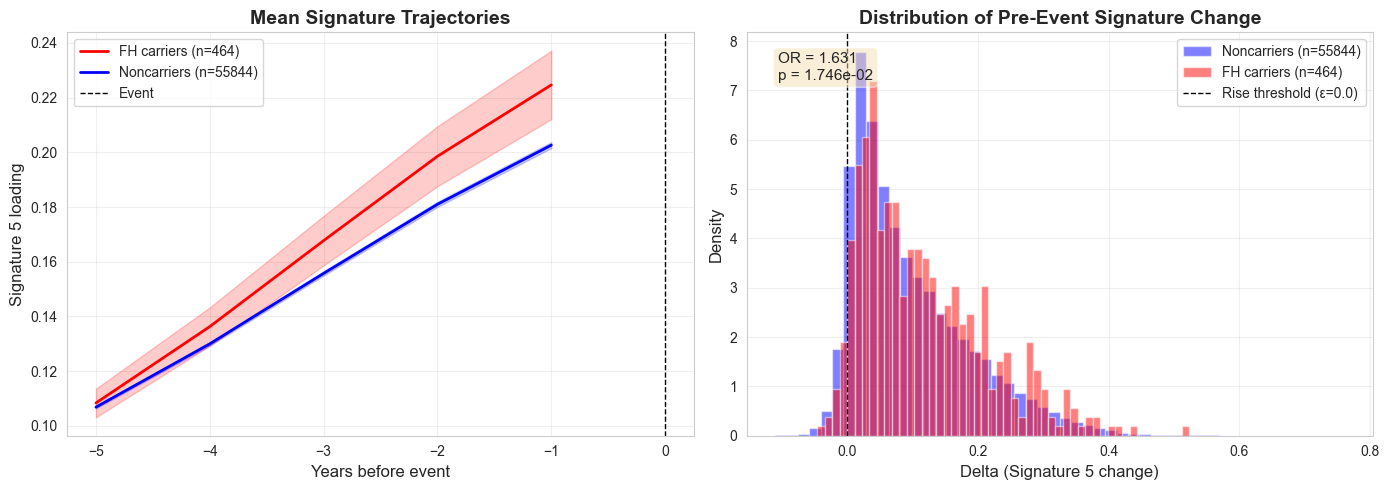

In [83]:
%run analyze_fh_carriers_signature.py \
    --fh_file /Users/sarahurbut/Downloads/out/ukb_exome_450k_fh.carrier.txt \
    --signature_idx 5 \
    --event_indices 112,113,114,115,116 \
    --output_dir results/fh_analysis \
    --plot

In [32]:
# ============================================================================
# VISUALIZE MODEL LEARNING (KEY INSIGHT FIGURE)
# ============================================================================
"""
Creates a figure showing the key insight: Model learns to distinguish between
high-risk and lower-risk hypercholesterolemia patients.

Non-droppers (predictions stay high) have HIGHER event rates → Model correctly
identifies high-risk patients. This shows the model is learning and calibrating.
"""
%run analyze_prediction_drops.py --disease ASCVD
%run visualize_model_learning.py --disease ASCVD


Loading data...
ANALYZING PREDICTION DROPS FOR: ASCVD
'ASCVD' is a disease group. Finding individual diseases...
  Found: Myocardial infarction at index 112
  Found: Coronary atherosclerosis at index 114
  Found: Other acute and subacute forms of ischemic heart disease at index 116
  Found: Unstable angina (intermediate coronary syndrome) at index 111
  Found: Angina pectoris at index 113
  Found: Other chronic ischemic heart disease, unspecified at index 115
Found 6 disease(s) for 'ASCVD'

Analyzing 400000 patients...

Collected 400000 patients with both 0yr and 1yr predictions

Prediction drop statistics:
  Mean drop: -0.0004
  Median drop: -0.0004
  Min drop: -0.0063
  Max drop: 0.0141

Patients with large prediction drops (top 5%, threshold=0.0001): 20006
  (Out of 400000 total patients)

  These are patients where:
    - At enrollment (0yr washout): predicted risk = 0.0222
    - At enrollment+1yr (1yr washout): predicted risk = 0.0206
    - Drop = 0.0016

Analyzing diseases presen

In [11]:
# ============================================================================
# VISUALIZE ALL COMPARISONS
# ============================================================================
"""
Creates plots for all comparisons (external scores, Delphi, etc.)
Plots saved to: results/comparisons/plots/
"""

%run visualize_all_comparisons.py


VISUALIZING ALL COMPARISONS

1. Loading external scores comparison...
   Columns in CSV: ['Aladynoulli_AUC', 'Aladynoulli_CI_lower', 'Aladynoulli_CI_upper', 'PCE_AUC', 'PCE_CI_lower', 'PCE_CI_upper', 'Difference', 'N_patients', 'N_events', 'QRISK3_AUC', 'QRISK3_CI_lower', 'QRISK3_CI_upper', 'QRISK3_Difference', 'PREVENT_AUC', 'PREVENT_CI_lower', 'PREVENT_CI_upper', 'Gail_AUC', 'Gail_CI_lower', 'Gail_CI_upper']
   Index: ['ASCVD_10yr', 'ASCVD_30yr', 'Breast_Cancer_10yr_Female', 'Breast_Cancer_10yr_Male', 'Breast_Cancer_10yr_All']
   Creating external scores comparison plot...
✓ Saved plot to: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/comparisons/plots/external_scores_comparison.png

2. Creating Delphi comparison plot...
   Columns in Delphi file: ['Aladynoulli_1yr_0gap', 'Delphi_1yr_0gap', 'Diff_0gap', 'Aladynoulli_1yr_1gap', 'Delphi_1yr_1gap', 'Diff_1gap']
✓ Saved plot to: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/resu

---

## SECTION 7: AGE OFFSET SIGNATURE ANALYSIS (OPTIONAL)

**Advanced Analysis**: How predictions and signatures change across training time points (t0-t9)


In [72]:
# ============================================================================
# MI WASHOUT ANALYSIS: SIGNATURE-BASED LEARNING
# ============================================================================
"""
Analyzes MI (Myocardial Infarction) washout with signature-based learning.

For each patient, tracks:
- 3 MODELS: m0t9, m5t9, m9t9 (all predict at t9, trained to t0, t5, t9)
- 3 TIME PERIODS: 
  1) Baseline (before t0/enrollment)
  2) Interval t0-t5
  3) Interval t5-t9
- For each period: MI status and Signature 5 precursor diseases

Categorizes washout based on what developed in intervals (not baseline).
"""

import subprocess
import sys
from pathlib import Path

script_dir = Path('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks')

result = subprocess.run([
    sys.executable,
    str(script_dir / 'analyze_mi_washout_signature.py'),
    '--start_idx', '0',
    '--end_idx', '10000'
], capture_output=True, text=True)

print(result.stdout)
if result.stderr:
    print("STDERR:", result.stderr)
if result.returncode != 0:
    print(f"\n⚠️  WARNING: Script exited with return code {result.returncode}")

MI WASHOUT ANALYSIS WITH SIGNATURE-BASED LEARNING
Batch: 0-10000

Loading essentials...
✓ Found MI at index 112: Myocardial infarction

Loading cluster assignments...
✓ Loaded clusters: 348 diseases

✓ MI belongs to Signature 5
✓ Found 7 diseases in Signature 5
  Examples: ['Hypercholesterolemia', 'Unstable angina (intermediate coronary syndrome)', 'Myocardial infarction', 'Angina pectoris', 'Coronary atherosclerosis']

Loading data batch 0-10000...

Loading pi batches for offsets 0-9...
✓ Loaded 10 pi batches

Loading model checkpoints to extract lambda...

ANALYZING MI WASHOUT

Analyzing 10000 patients...
MI index: 112
Signature 5 has 7 diseases

✓ Saved results to: results/analysis/mi_washout_analysis_batch_0_10000.csv

SUMMARY STATISTICS
Total patients analyzed: 10000

Washout categories:
washout_category
neither         8694
accurate        1028
conservative     278
Name: count, dtype: int64

MI status at t9: 435 patients (4.3%)

Patients with Signature 5 precursors at t9: 1600 (1

In [75]:

%run visualize_mi_washout_signature.py

VISUALIZING MI WASHOUT ANALYSIS
✓ Saved figure to: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/analysis/plots/mi_washout_signature_analysis.png

VISUALIZATION COMPLETE


In [65]:
# ============================================================================
# ANALYZE AGE OFFSET SIGNATURE CHANGES
# ============================================================================
"""
Analyzes how predictions and signature loadings change across age offsets (t0-t9).

For patients with specific precursor diseases, tracks:
1. How their predictions change across offsets 0-9
2. Which signatures/clusters are most impacted
3. Which precursor diseases drive which signature changes

This shows how the model learns and adapts as more data becomes available.
"""

# Run analysis for key precursor diseases
import subprocess
import sys
from pathlib import Path

script_dir = Path('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks')

result = subprocess.run([
    sys.executable,
    str(script_dir / 'analyze_age_offset_signatures.py'),
    '--approach', 'pooled_retrospective',
    '--target_disease', 'ASCVD',
    '--start_idx', '0',
    '--end_idx', '10000'
], capture_output=True, text=True)

print(result.stdout)
if result.stderr:
    print("STDERR:", result.stderr)
if result.returncode != 0:
    print(f"\n⚠️  WARNING: Script exited with return code {result.returncode}")


ANALYZING AGE OFFSET SIGNATURE CHANGES

Approach: pooled_retrospective
Batch: 0-10000
Target disease: ASCVD
Precursor diseases: ['Hypercholesterolemia', 'Essential hypertension', 'Type 2 diabetes', 'Atrial fibrillation and flutter', 'Obesity', 'Chronic Kidney Disease, Stage III', 'Rheumatoid arthritis', 'Sleep apnea', 'Peripheral vascular disease, unspecified']

Loading essentials...
Loading cluster assignments...
  ✓ Loaded clusters as numpy array from: /Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/data_for_running/initial_clusters_400k.pt
  Cluster shape: (348,)
✓ Loaded clusters: 348 diseases, 20 clusters

Loading data batch 0-10000...

Loading pi batches for offsets 0-9...
  Loading offset 0...
  Loading offset 1...
  Loading offset 2...
  Loading offset 3...
  Loading offset 4...
  Loading offset 5...
  Loading offset 6...
  Loading offset 7...
  Loading offset 8...
  Loading offset 9...
✓ Loaded 10 pi batches

Loading model checkpoints to extract lambda (patient-specifi

In [69]:
%run visualize_age_offset_probabilities.py


VISUALIZING AGE OFFSET PROBABILITY ANALYSIS


/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/visualize_age_offset_probabilities.py:286: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  ax4.set_title('Predicted Probability Distribution\n' +
/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/visualize_age_offset_probabilities.py:290: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  ax4.grid(True, alpha=0.3, axis='y')


✓ Saved figure to: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/analysis/plots/age_offset_probability_analysis_ASCVD.png

VISUALIZATION COMPLETE


In [66]:
%run visualize_age_offset_signatures.py

VISUALIZING AGE OFFSET SIGNATURE ANALYSIS
✓ Saved figure to: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/analysis/plots/age_offset_signature_analysis_ASCVD.png

VISUALIZATION COMPLETE


## Summary: Age Offset Signature Analysis

**Question:** When models are trained with different amounts of data (washout periods), how do patient-specific parameters (lambda) change, and does this reflect conservative vs. accurate washout?

**Findings:**

1. **Conservative washout (with outcome events):**
   - Patients who had ASCVD events during washout
   - Signature 5 (cardiovascular cluster) shows large positive lambda changes (+0.587 for hypercholesterolemia)
   - Model learns from patients who already had outcomes

2. **Accurate washout (with precursor only):**
   - Patients with precursors (e.g., hypercholesterolemia) but no ASCVD outcome during washout
   - Signature 5 shows moderate positive lambda changes (+0.305)
   - Model learns from pre-clinical signals (risk factors before outcomes)

3. **Model refinement (without either):**
   - Patients with neither precursor nor outcome
   - Small negative lambda changes (-0.053)
   - Model becomes more conservative/refined

**Interpretation:**
- The model distinguishes between:
  - Real conditions (outcomes) → large changes
  - Pre-clinical signals (precursors) → moderate changes
  - Neither → small/negative changes
- This validates washout accuracy: the model learns from legitimate risk factors, not just future outcomes
- Signature 5 correctly responds to cardiovascular precursors even when outcomes haven't occurred yet

**Conclusion:** This pattern supports model validity and washout accuracy. The model learns appropriately from pre-clinical signals, which is the intended behavior for accurate washout.

---

## SECTION 6: SUMMARY & KEY FINDINGS

**Read-Only**: Summary of results and interpretations


### Key Findings

**Performance Summary:**
- Aladynoulli outperforms external risk scores (PCE, PREVENT, QRISK3) for ASCVD
- Comparable to Gail model for breast cancer (women only)
- Outperforms Delphi-2M for most diseases across multiple time horizons
- Significantly better than Cox baseline (age + sex only)

**Prediction Drops Analysis:**
- Prediction drops between 0yr and 1yr washout are **expected behavior**
- Model refines/calibrates predictions based on observed outcomes
- Hypercholesterolemia patients show largest drops (model learns to distinguish high-risk vs lower-risk)
- Similar behavior to Delphi - both models learn and calibrate over time

**Reproducibility:**
- AWS vs Local differences are negligible when aggregated
- Per-batch differences average out over large populations
- Results are reproducible across computational environments

**Model Strengths:**
- Multi-horizon predictions (1yr, 5yr, 10yr, 30yr)
- Dynamic risk assessment (updates with new information)
- Works across both sexes (unlike Gail which is women-only)
- Handles multiple diseases simultaneously
